In [1]:
%pylab inline

/Users/chalpert/.virtualenvs/ds/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
import easel

/Users/chalpert/.virtualenvs/ds/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import pandas as pd

In [4]:
from scipy.cluster.hierarchy import *

In [5]:
import seaborn as sns

In [6]:
business_file = '/Users/chalpert/Documents/Columbia/Big_Data/Project/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json'
business_category_file = '/Users/chalpert/Documents/Columbia/Big_Data/Project/yelp_dataset_challenge_academic_dataset/business_category.csv'

business_df = pd.read_json(business_file, orient='records', lines=True)
business_category_df = pd.read_csv(business_category_file)

In [7]:
business_df.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{u'Tuesday': {u'close': u'21:00', u'open': u'1...",40.354327,-79.900706,Mr Hoagie,[],True,7,3.5,PA,business
1,"{u'Happy Hour': True, u'Accepts Credit Cards':...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,[],True,5,3.0,PA,business
2,{u'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.354115,-80.014660,Cool Springs Golf Center,[],False,5,2.5,PA,business
3,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,"414 Hawkins Ave\nBraddock, PA 15104","{u'Tuesday': {u'close': u'19:00', u'open': u'1...",40.408830,-79.866211,Emil's Lounge,[],True,26,4.5,PA,business
4,"{u'Takes Reservations': True, u'Accepts Credit...",mYSpR_SLPgUVymYOvTQd_Q,"[Active Life, Golf]",Braddock,"1000 Clubhouse Dr\nBraddock, PA 15104","{u'Sunday': {u'close': u'15:00', u'open': u'10...",40.403405,-79.855782,Grand View Golf Club,[],True,3,5.0,PA,business


In [121]:
restaurant_ids = business_category_df[lambda x: x['categories_value'] == 'Restaurants']['business_id']
restaurant_ids = restaurant_ids.reset_index(drop=True)

In [122]:
restaurants_df = business_df[lambda x: x['business_id'].isin(restaurant_ids.values)]

In [118]:
business_file = '/Users/chalpert/Documents/Columbia/Big_Data/Project/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json'
business_category_file = '/Users/chalpert/Documents/Columbia/Big_Data/Project/yelp_dataset_challenge_academic_dataset/business_category.csv'

business_df = pd.read_json(business_file, orient='records', lines=True)
business_category_df = pd.read_csv(business_category_file)

In [ ]:
review_file = '/Users/chalpert/Documents/Columbia/Big_Data/Project/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json'

review_df = pd.read_json(review_file, orient='records', lines=True)

# Review count over time

In [236]:
(business_df
.sort_values('review_count', ascending=False)
.head()
.tail()
)

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
20187,"{u'Alcohol': u'full_bar', u'Open 24 Hours': Fa...",4bEjOyTaDG24SY5TxsaUNQ,"[Breakfast & Brunch, Steakhouses, French, Rest...",Las Vegas,"3655 Las Vegas Blvd S\nThe Strip\nLas Vegas, N...","{u'Monday': {u'close': u'23:00', u'open': u'07...",36.112952,-115.172589,Mon Ami Gabi,[The Strip],True,6200,4.0,NV,business
60454,"{u'Take-out': False, u'Accepts Credit Cards': ...",sIyHTizqAiGu12XMLX3N3g,"[Buffets, Restaurants]",Las Vegas,Caesars Palace Las Vegas Hotel And Casino\n357...,"{u'Monday': {u'close': u'22:00', u'open': u'07...",36.115854,-115.176174,Bacchanal Buffet,[The Strip],True,5216,4.0,NV,business
50493,"{u'Take-out': False, u'Accepts Credit Cards': ...",zt1TpTuJ6y9n551sw9TaEg,"[Breakfast & Brunch, Buffets, Restaurants]",Las Vegas,The Cosmopolitan of Las Vegas\n3708 Las Vegas ...,"{u'Monday': {u'close': u'21:00', u'open': u'17...",36.109876,-115.175164,Wicked Spoon,[The Strip],True,4967,3.5,NV,business
27816,"{u'Take-out': True, u'Accepts Credit Cards': T...",2e2e7WgqU1BnpxmQL5jbfw,"[Sandwiches, Restaurants]",Las Vegas,Planet Hollywood Resort & Casino\n3667 Las Veg...,"{u'Monday': {u'close': u'00:00', u'open': u'00...",36.109930,-115.170862,Earl of Sandwich,[The Strip],True,4687,4.5,NV,business
62785,"{u'Take-out': True, u'Accepts Credit Cards': T...",aGbjLWzcrnEx2ZmMCFm3EA,"[Burgers, Restaurants]",Las Vegas,Planet Hollywood Las Vegas Resort & Casino\n36...,"{u'Monday': {u'close': u'00:00', u'open': u'11...",36.110108,-115.172338,Gordon Ramsay BurGR,[The Strip],True,4620,4.0,NV,business


In [12]:
business_id = 'sIyHTizqAiGu12XMLX3N3g'

In [13]:

def review_avg_by_date(df):
        
        df['date'] = pd.to_datetime(df['date'])
        df = df.sort_values('date')
        df['moving_avg'] = (df
                        .stars
                .ewm(span=28)
                 .mean()
            )
        review_count = (df
                        .groupby('date')
                        .moving_avg
                        .last()
                        .resample('D')
                        .ffill()
        )
        review_count.index = review_count.index.map(lambda x: str(x.date()))
        review_count = review_count.ix['2015-01-01':].reset_index()
        review_count.columns = ['date','avg_rating']
        return review_count

In [14]:
def review_count_by_date(df):
    df['date'] = pd.to_datetime(df['date'])
    df = (
 df
 .groupby('date')
     .stars
     .count()
 .resample('D')
     .sum()
 .fillna(0)
 
 )
    df = df.cumsum()
    df = df.ix['2015-01-01':]
    df = df.reset_index()
    df.columns = ['date','review_count']
    return df

In [98]:
business_df.head()

NameError: name 'business_df' is not defined

In [16]:
review_avg = review_avg_by_date(review_df.loc[lambda x: x['business_id'] == business_id])
review_count = review_count_by_date(review_df.loc[lambda x: x['business_id'] == business_id])

NameError: name 'review_df' is not defined

In [114]:
review_df

NameError: name 'review_df' is not defined

In [296]:
review_avg.to_csv('./review_avg.tsv', sep='\t', header=True, index=False)
review_count.to_csv('./review_count.tsv', sep='\t', header=True, index=False)

In [105]:
review_avg = pd.read_csv('./review_avg.tsv', sep='\t')

In [261]:
# Current restaurants category
categories = business_category_df[lambda x: x['business_id'] == business_id]['categories_value'].values

In [262]:
# Current restaurants city
city = business_df[lambda x: x['business_id'] == business_id]['city'].values[0]

In [263]:
# Filter businesses in city
businesses = business_df[lambda x: x['city'] == city]['business_id'].unique()

In [264]:
# Filter businesses in city & categories
businesses = business_category_df[(business_category_df['business_id'].isin(businesses)) & (business_category_df['categories_value'].isin(categories))]['business_id'].unique()

In [265]:
competition = review_avg_by_date(review_df.loc[lambda x: x['business_id'].isin(businesses)])

/Users/chalpert/.virtualenvs/ds/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


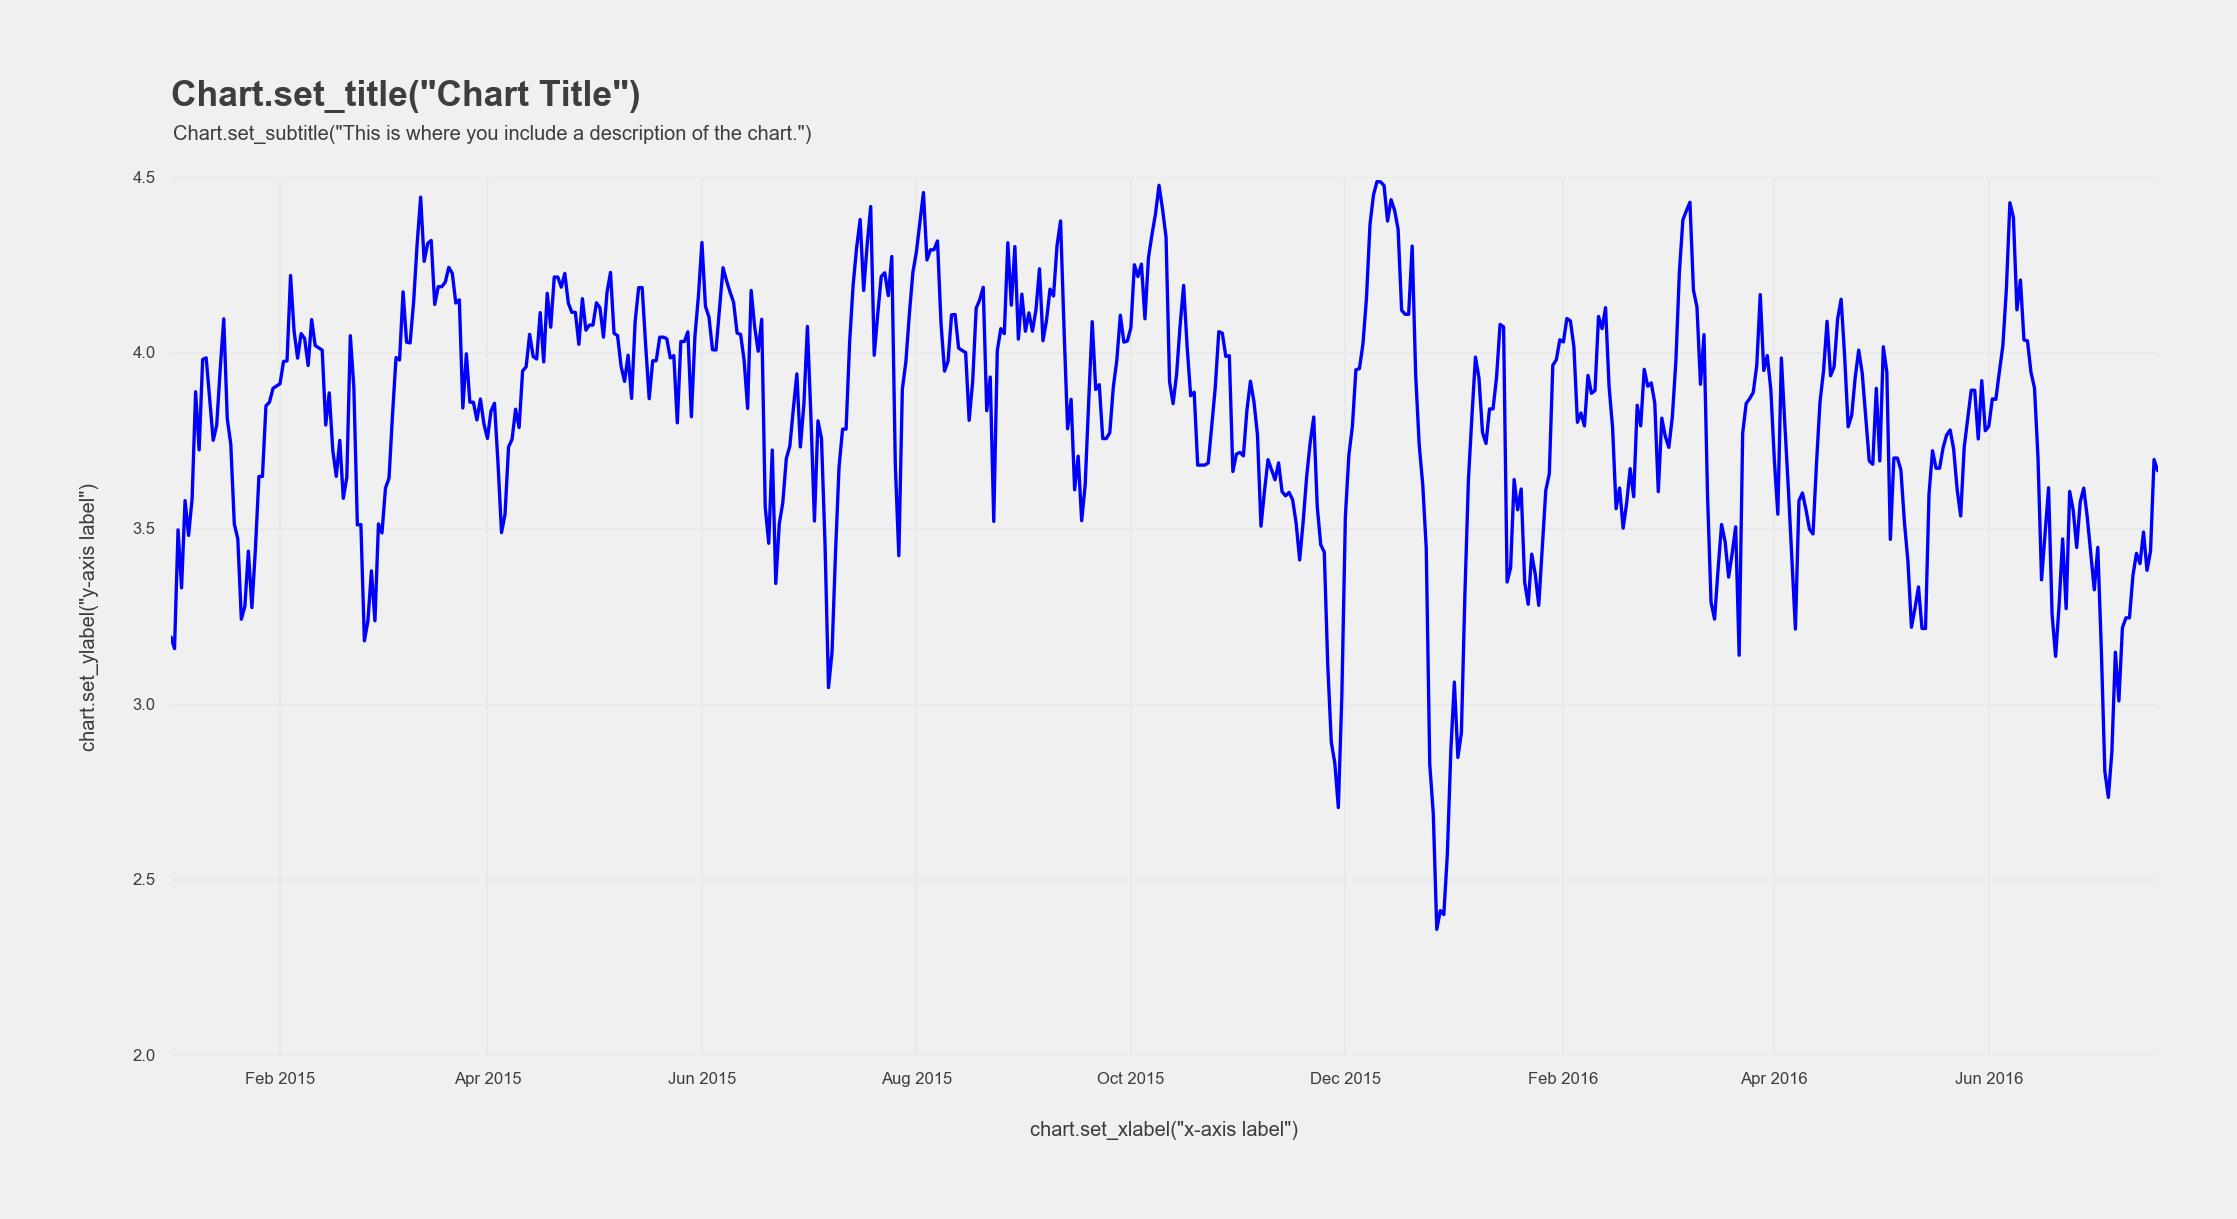

In [267]:
ch = easel.Chart()
# ch.line(pd.to_datetime(competition['date']), competition['avg_rating'])
ch.line(pd.to_datetime(review_count['date']), review_count['avg_rating'], color='blue')


# Topics

In [301]:
import gensim

ImportError: No module named gensim

# Rating count over time

# Review overlap

# By category

In [45]:
business_category_df.head()

,business_id,categories_value
0,5UmKMjUEUNdYWqANhGckJw,Fast Food
1,5UmKMjUEUNdYWqANhGckJw,Restaurants
2,UsFtqoBl7naz8AVUBZMjQQ,Nightlife
3,cE27W9VPgO88Qxe4ol6y_g,Active Life
4,cE27W9VPgO88Qxe4ol6y_g,Mini Golf


### Most restaurants have multiple categories
- Count of categories per restaurant

In [47]:
(restaurants_df
 .merge(business_category_df, on='business_id')
 .groupby('business_id')
 .categories_value
 .nunique()
 .value_counts()
)

2     11785
3      6182
4      4915
5      2409
6       989
1       282
7       147
8        17
9         2
10        1
Name: categories_value, dtype: int64

# Restaurant overlap

In [128]:
category_count = (restaurants_df
 .merge(business_category_df, on='business_id')
 .groupby('categories_value')
 .business_id
 .nunique()
 .sort_values(ascending=True)
)

In [129]:
top_categories = category_count[category_count > 100].index

In [130]:
len(top_categories)

69

In [123]:
restaurant_categories = restaurants_df.merge(business_category_df, on='business_id')[['business_id', 'categories_value']]
restaurant_categories['ones'] = 1
restaurant_overlap = pd.pivot_table(restaurant_categories, index='categories_value', columns='business_id', aggfunc=max, values='ones')

In [124]:
restaurant_overlap = restaurant_overlap.fillna(0)

In [125]:
def calc_overlap(df):
    jaccard_matrix = np.zeros((len(df),len(df)))
    for i, indx_i in enumerate(df.index):
        for j, indx_j in enumerate(df.index):
            num = (df.ix[[indx_i, indx_j]].sum(axis=0) == 2).sum()
            denom = df.ix[indx_i].sum()
            jaccard_matrix[i, j] = num * 1.0/ denom
    #jaccard_matrix = jaccard_matrix + jaccard_matrix.T
    for i, j in zip(range(len(df)), range(len(df))):
        jaccard_matrix[i, j] = 1
    return jaccard_matrix
            

In [126]:
overlap =  calc_overlap(restaurant_overlap.reindex(top_categories))

NameError: name 'top_categories' is not defined

In [127]:
ctab = pd.DataFrame(overlap, index=restaurant_overlap.reindex(top_categories).index, columns=restaurant_overlap.reindex(top_categories).index)
#ctab = pd.DataFrame(np.corrcoef(goals_by_website), index=goals_by_website.index, columns=goals_by_website.index)
z = linkage(ctab)
d = dendrogram(z, labels=ctab.index,leaf_rotation=90)
sns.despine()

NameError: name 'overlap' is not defined

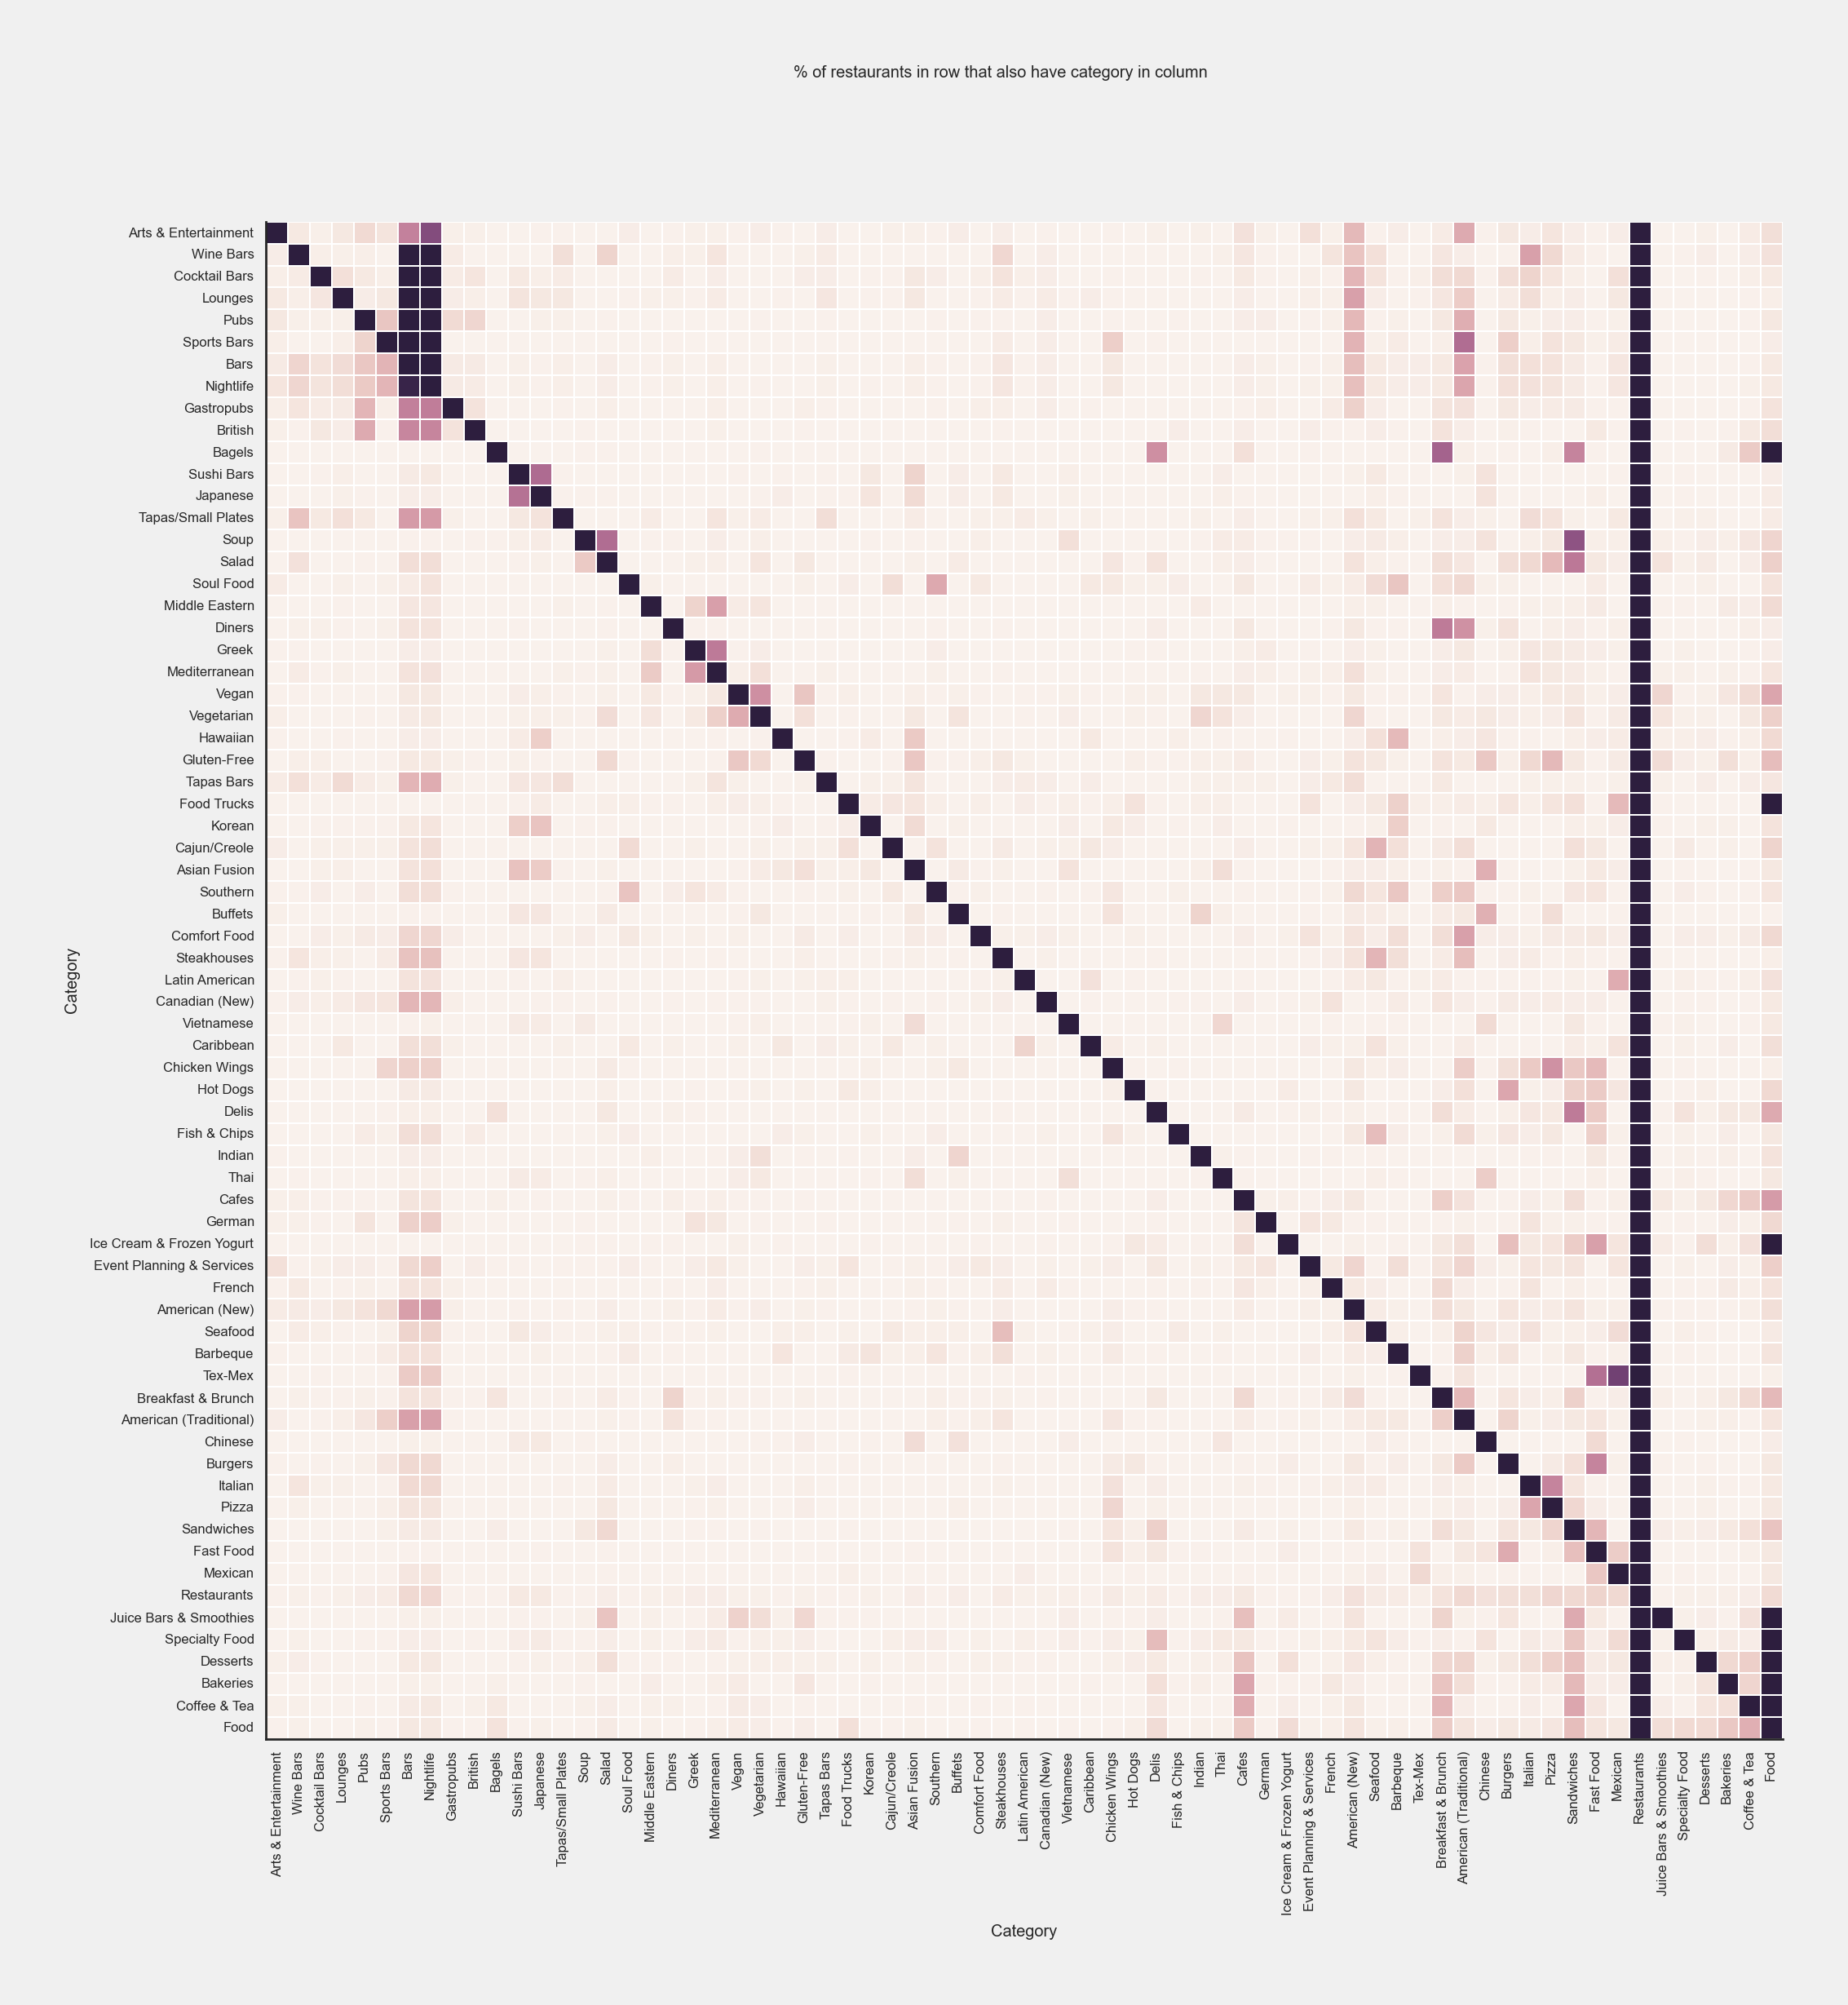

In [259]:
order = ctab.index[d['leaves']]
ctab_o = ctab.reindex_axis(order, axis=0).reindex_axis(order, axis=1)

mask = np.zeros_like(ctab_o)
#mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(ctab_o, annot=False, linewidths=.5, mask=mask, square=True, cbar=False, fmt='.2f')
    f.suptitle('% of restaurants in row that also have category in column')
ax.set_xlabel('Category')
ax.set_ylabel('Category')
sns.despine()

## Restaurant count
- Top 10

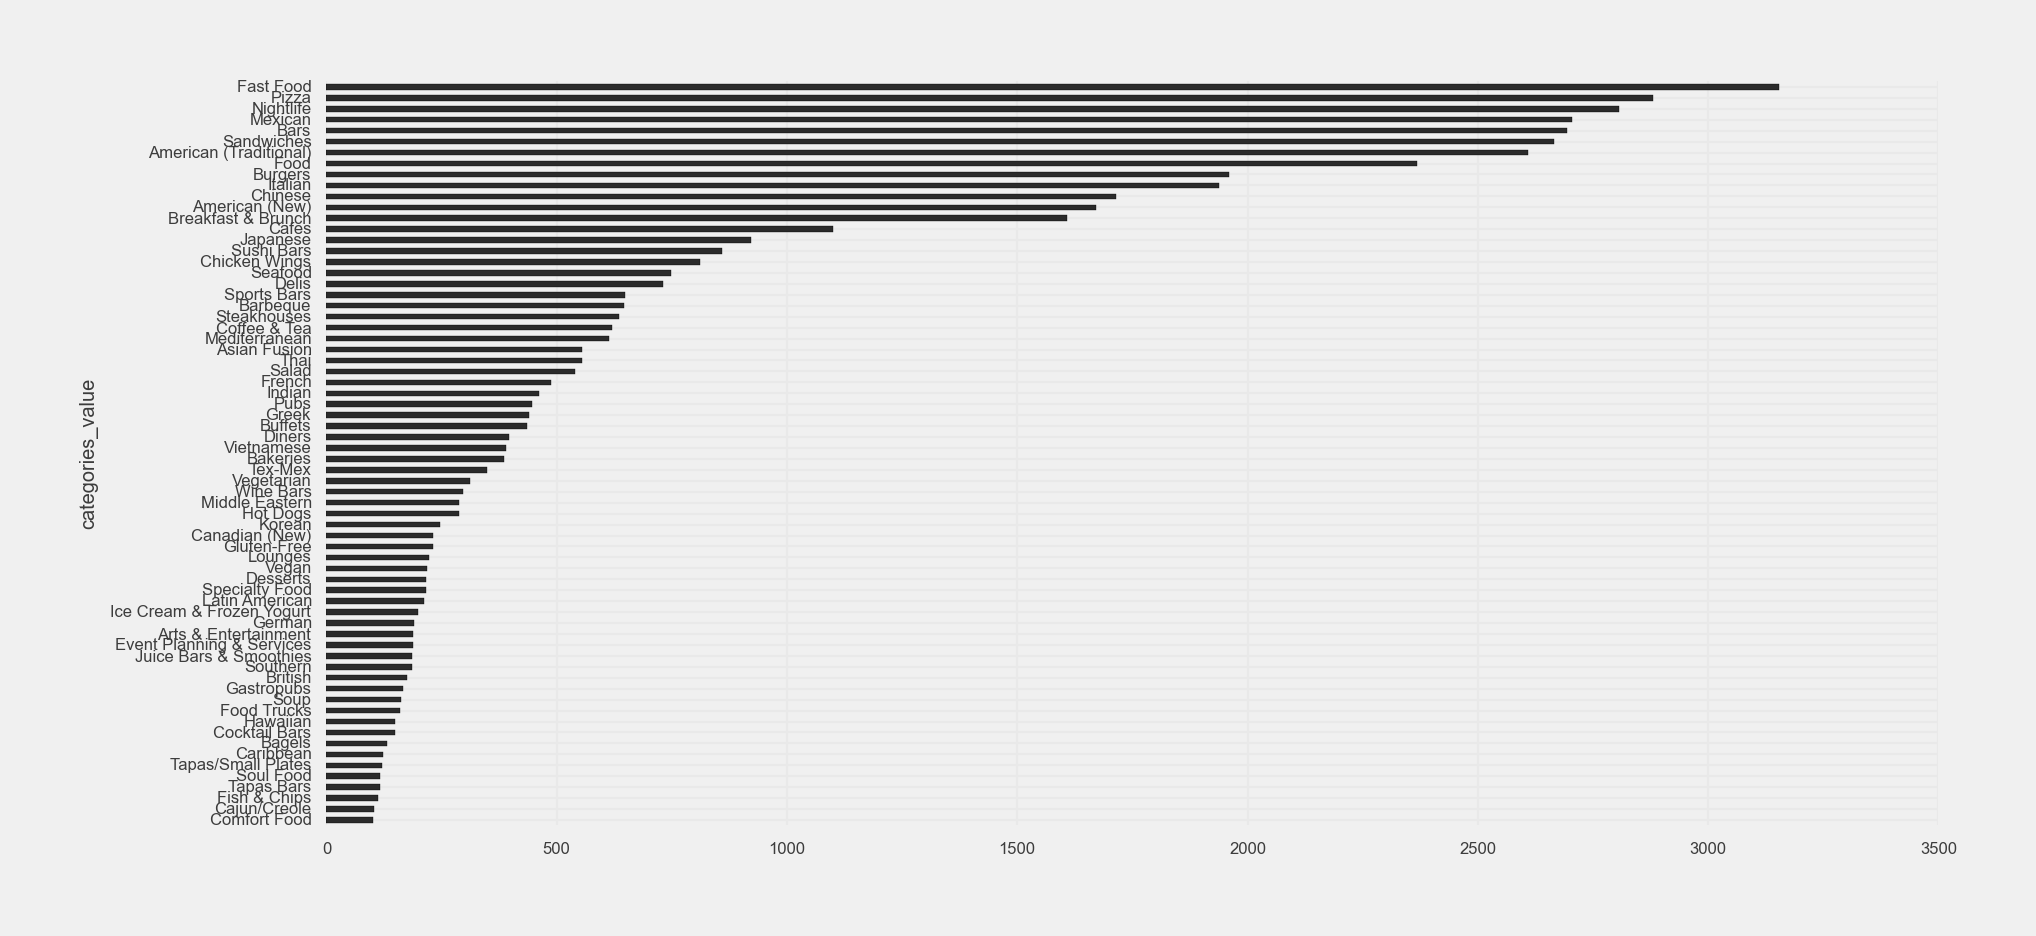

In [257]:
(restaurants_df
 .merge(business_category_df, on='business_id')
.loc[lambda x: x['categories_value'].isin(top_categories)]
 .groupby('categories_value')
 .business_id
 .nunique()
 .sort_values(ascending=True)
 .iloc[:-1]
).plot(kind='barh')

## Avg rating

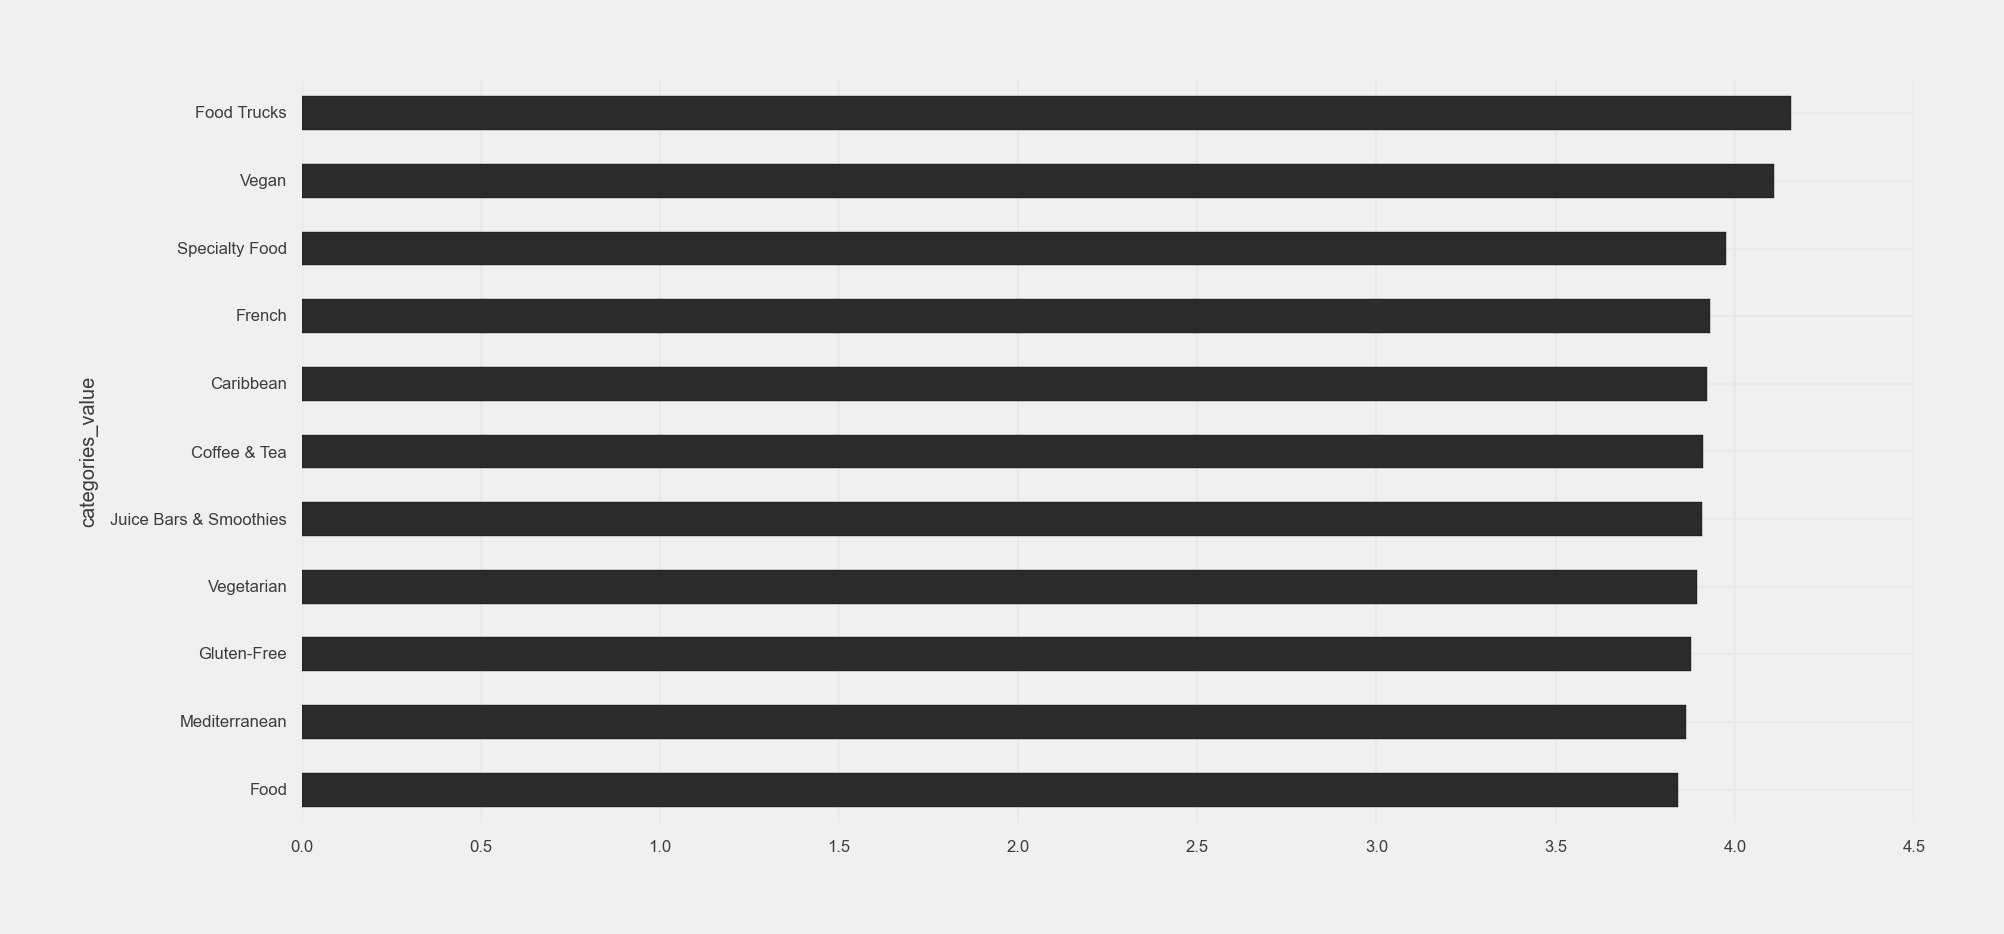

In [141]:
(restaurants_df
 .merge(business_category_df, on='business_id')
 .loc[lambda x: x['categories_value'].isin(top_categories)]
 .groupby('categories_value')
 .stars
 .mean()
 .sort_values(ascending=True)
 .iloc[-11:]
).plot(kind='barh')

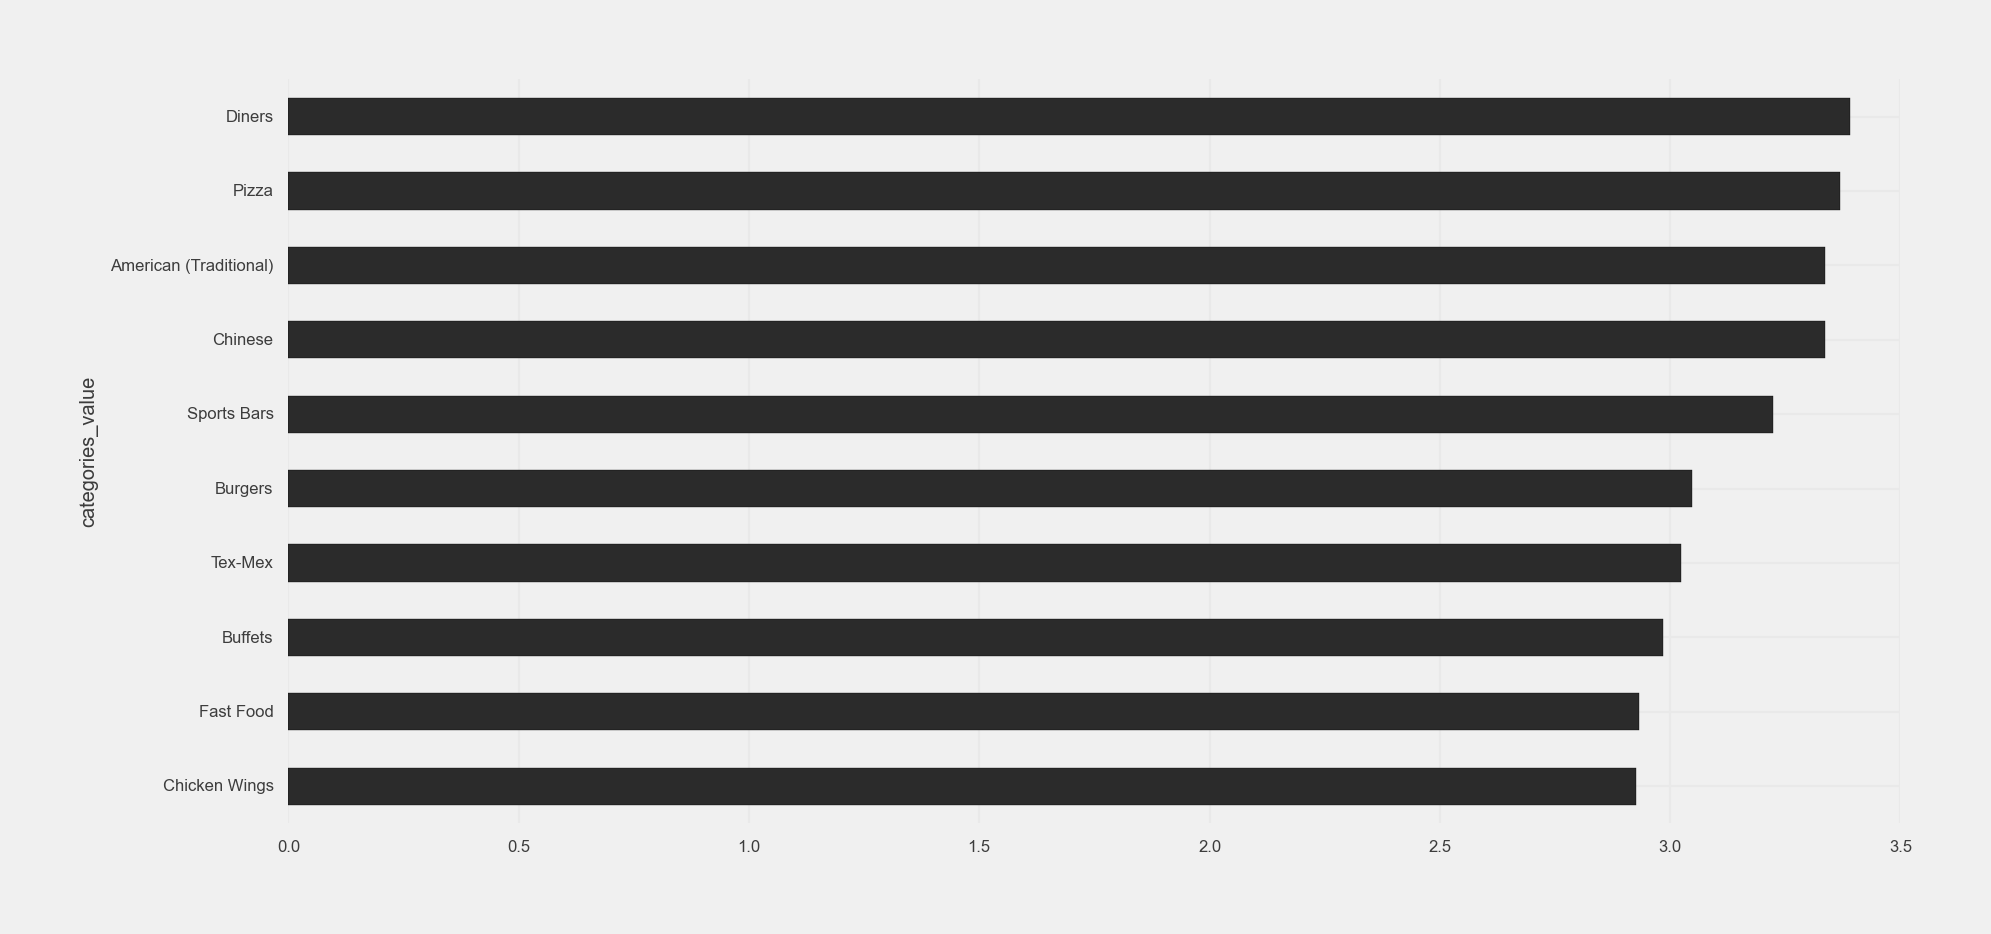

In [139]:
(restaurants_df
 .merge(business_category_df, on='business_id')
 .loc[lambda x: x['categories_value'].isin(top_categories)]
 .groupby('categories_value')
 .stars
 .mean()
 .sort_values(ascending=True)
 .iloc[:10]
).plot(kind='barh')

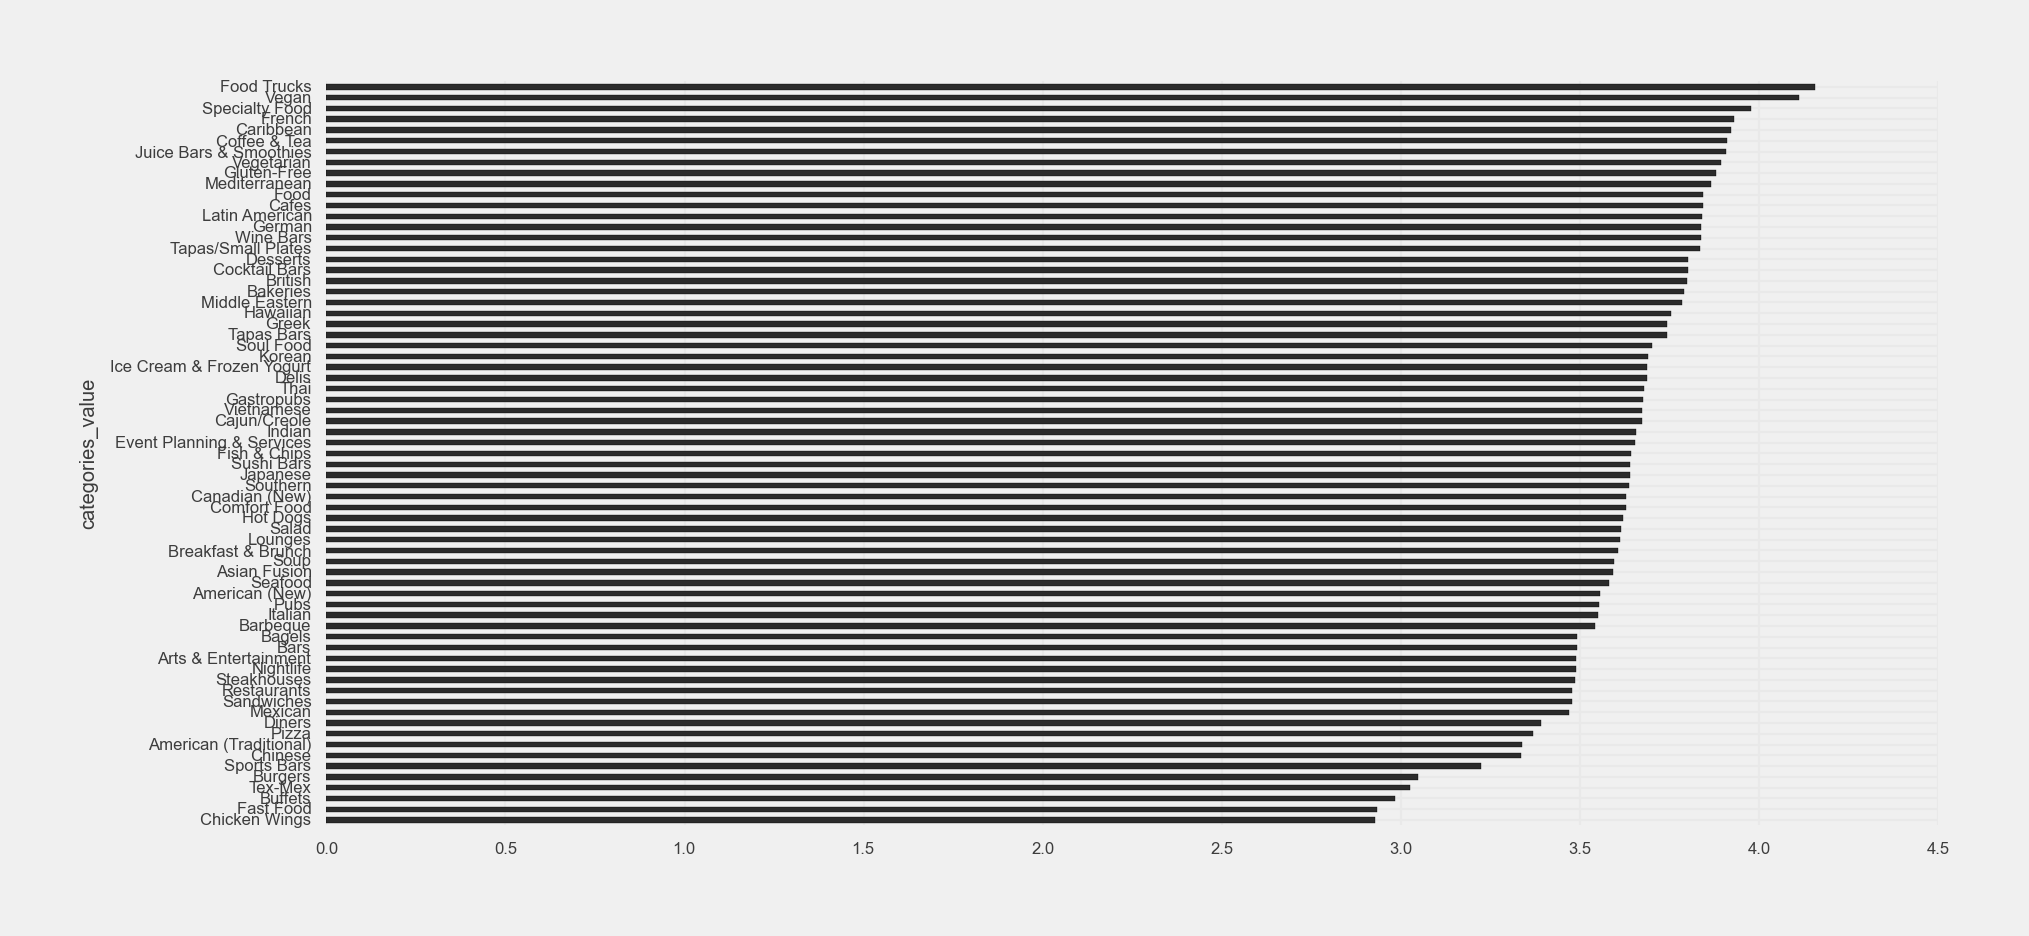

In [140]:
(restaurants_df
 .merge(business_category_df, on='business_id')
 .loc[lambda x: x['categories_value'].isin(top_categories)]
 .groupby('categories_value')
 .stars
 .mean()
 .sort_values(ascending=True)
).plot(kind='barh')

## Rating count

In [150]:
restaurant_count = (restaurants_df
 .merge(business_category_df, on='business_id')
 .loc[lambda x: x['categories_value'].isin(top_categories)]
 .groupby('categories_value')
 .business_id
 .nunique()
 .sort_values(ascending=True))

In [156]:
rating_count = (restaurants_df
 .merge(business_category_df, on='business_id')
 .loc[lambda x: x['categories_value'].isin(top_categories)]
 .groupby('categories_value')
 .review_count
 .sum()
 .sort_values(ascending=True)
)

# Rating count per restaurant

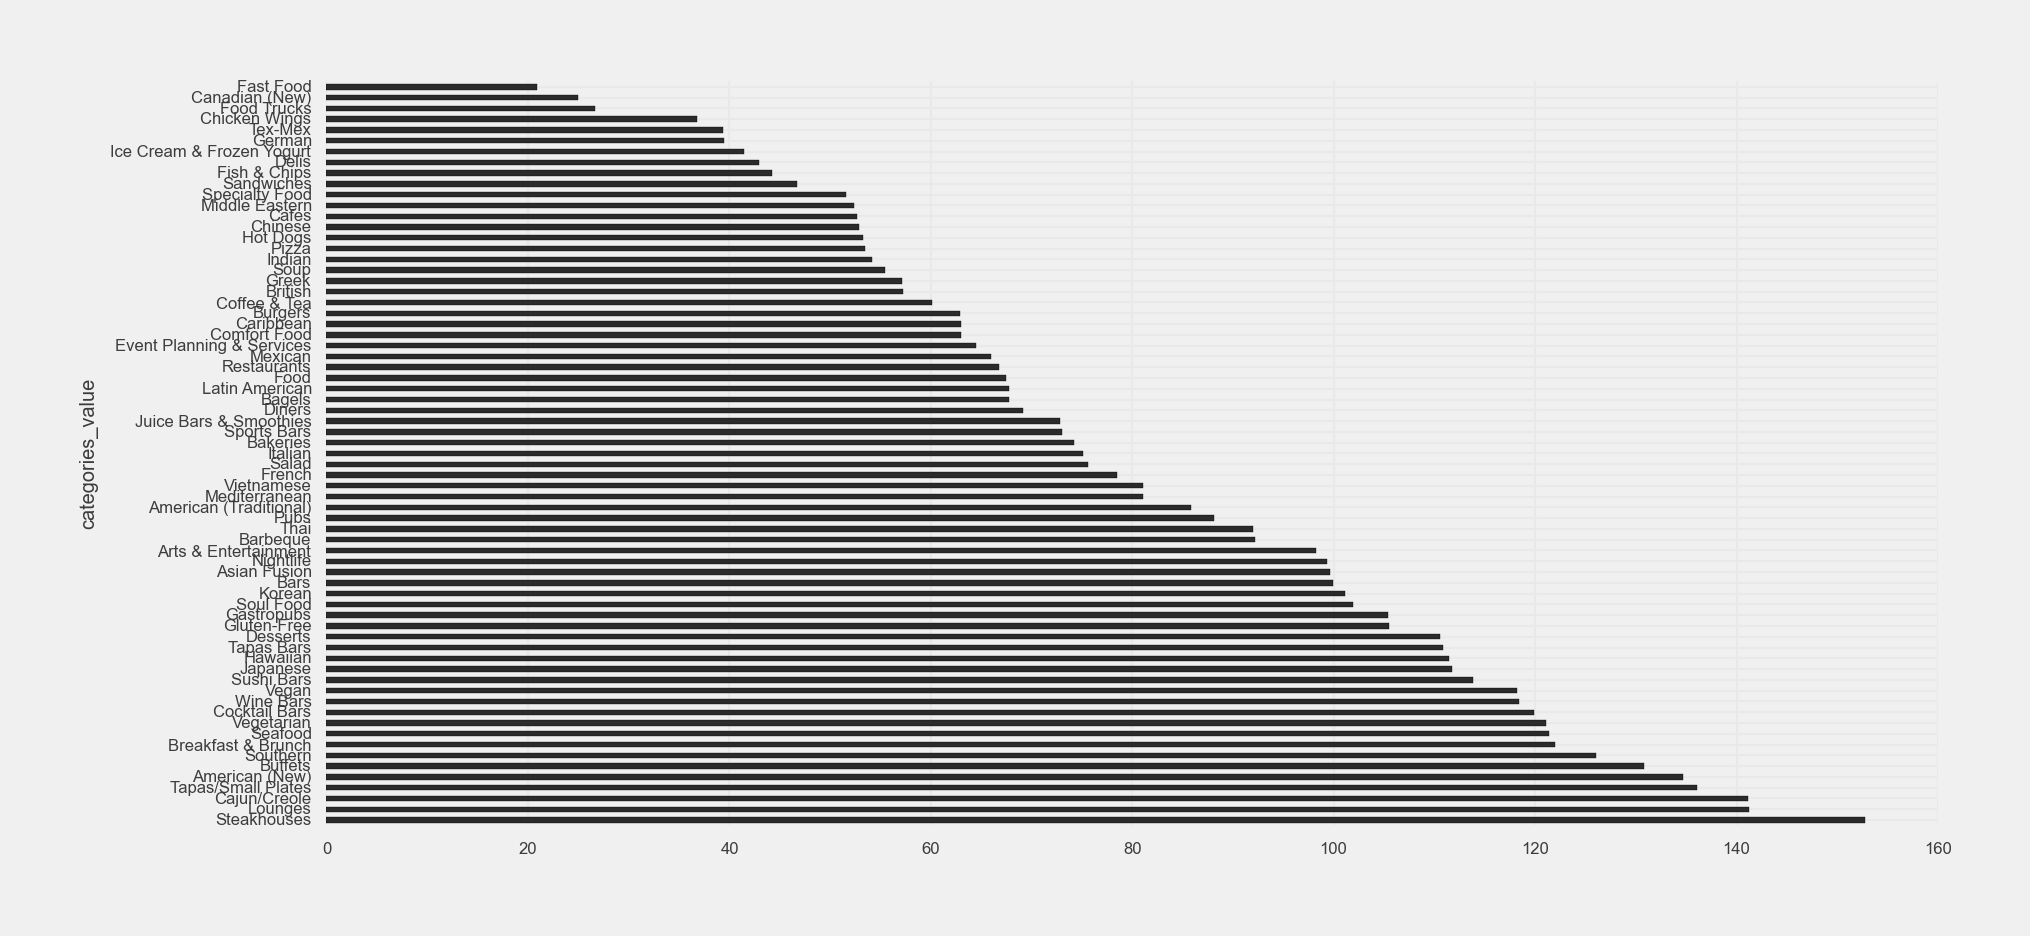

In [261]:
((rating_count / restaurant_count)
.sort_values(ascending=False)
.plot(kind='barh')
)

# Are higher ratings associated with more checkins?

# Need to control for restaurant age

In [2]:
import pandas as pd

In [93]:
checkin_file = '/Users/chalpert/Documents/Columbia/Big_Data/Project/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_checkin.json'

checkin_df = pd.read_json(checkin_file, orient='records', lines=True)

In [94]:
checkin_df['total_checkins'] = checkin_df['checkin_info'].apply(lambda x: sum(x.values()))

In [97]:
checkin_df[['business_id', 'total_checkins']].to_csv('total_checkins.csv', index=False)

In [53]:
info = checkin_df.loc[lambda x: x['business_id'] == 'wJr6kSA5dchdgOdwH6dZ2w', 'checkin_info']

In [89]:
checkins = pd.DataFrame.from_dict(info.values[0], orient='index')
checkins = checkins.reset_index()
checkins.columns = ['time', 'checkins']
checkins['hour'] = checkins['time'].str.split('-').str.get(0)
checkins['day'] = checkins['time'].str.split('-').str.get(1)
checkins_by_day = (checkins
                   .groupby('day')
                   .sum()
                   .reindex(index=['0', '1', '2', '3', '4', '5', '6'])
                   .fillna(0)
                   )
checkins_by_day.index = ['Sun', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat']
checkins_by_day = checkins_by_day.reset_index()
checkins_by_day.columns = ['day', 'checkins']
checkins_by_day

checkins_by_hour = (checkins
                   .groupby('hour')
                   .sum()
                   )
checkins_by_hour.index = checkins_by_hour.index.astype('int')
checkins_by_hour = (checkins_by_hour
 .reindex(index=range(24))
 .fillna(0)
 .reset_index()
 )
checkins_by_hour


,hour,checkins
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
5,5,1.0
6,6,2.0
7,7,3.0
8,8,1.0
9,9,2.0


In [91]:
{'day': checkins_by_day.to_csv(None, sep='\t', header=True, index=False), 
            'hour': checkins_by_hour.to_csv(None, sep='\t', header=True, index=False)}['day']

'day\tcheckins\nSun\t1.0\nMon\t2.0\nTues\t2.0\nWed\t0.0\nThur\t1.0\nFri\t3.0\nSat\t8.0\n'

In [1]:
categories = ['French']
categories = top_categories

NameError: name 'top_categories' is not defined

In [270]:
checkin_count = (restaurants_df
 .merge(business_category_df, on='business_id')
 .merge(checkin_df, on='business_id', how='left')
 .loc[lambda x: x['categories_value'].isin(categories)]
 .groupby('business_id')
 .total_checkins
 .sum()
 .sort_values(ascending=True))

In [271]:
avg_rating = (restaurants_df
 .merge(business_category_df, on='business_id')
 .loc[lambda x: x['categories_value'].isin(categories)]
 .groupby('business_id')
 .stars
 .mean()
 .sort_values(ascending=True)
)

In [272]:
checkin_rating = pd.concat([(checkin_count), avg_rating], axis=1)

In [273]:
checkin_rating.columns = ['avg_checkins', 'avg_rating']

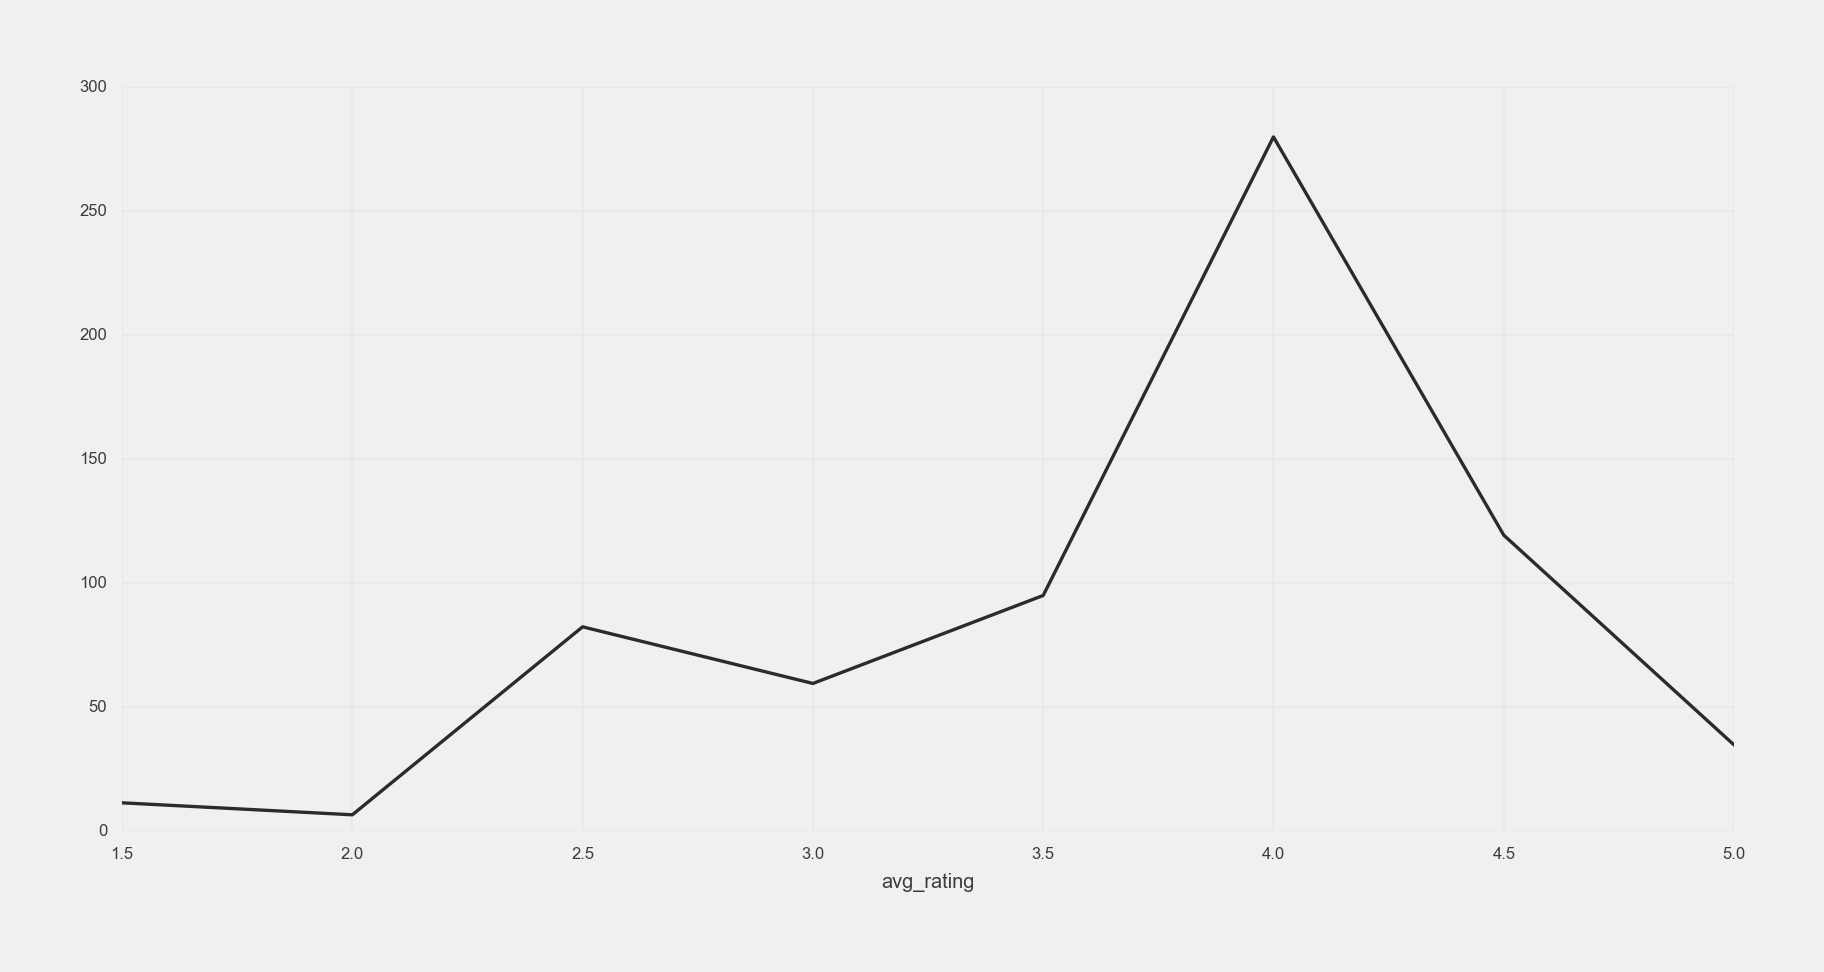

In [274]:
checkin_rating.groupby('avg_rating')['avg_checkins'].mean().plot()

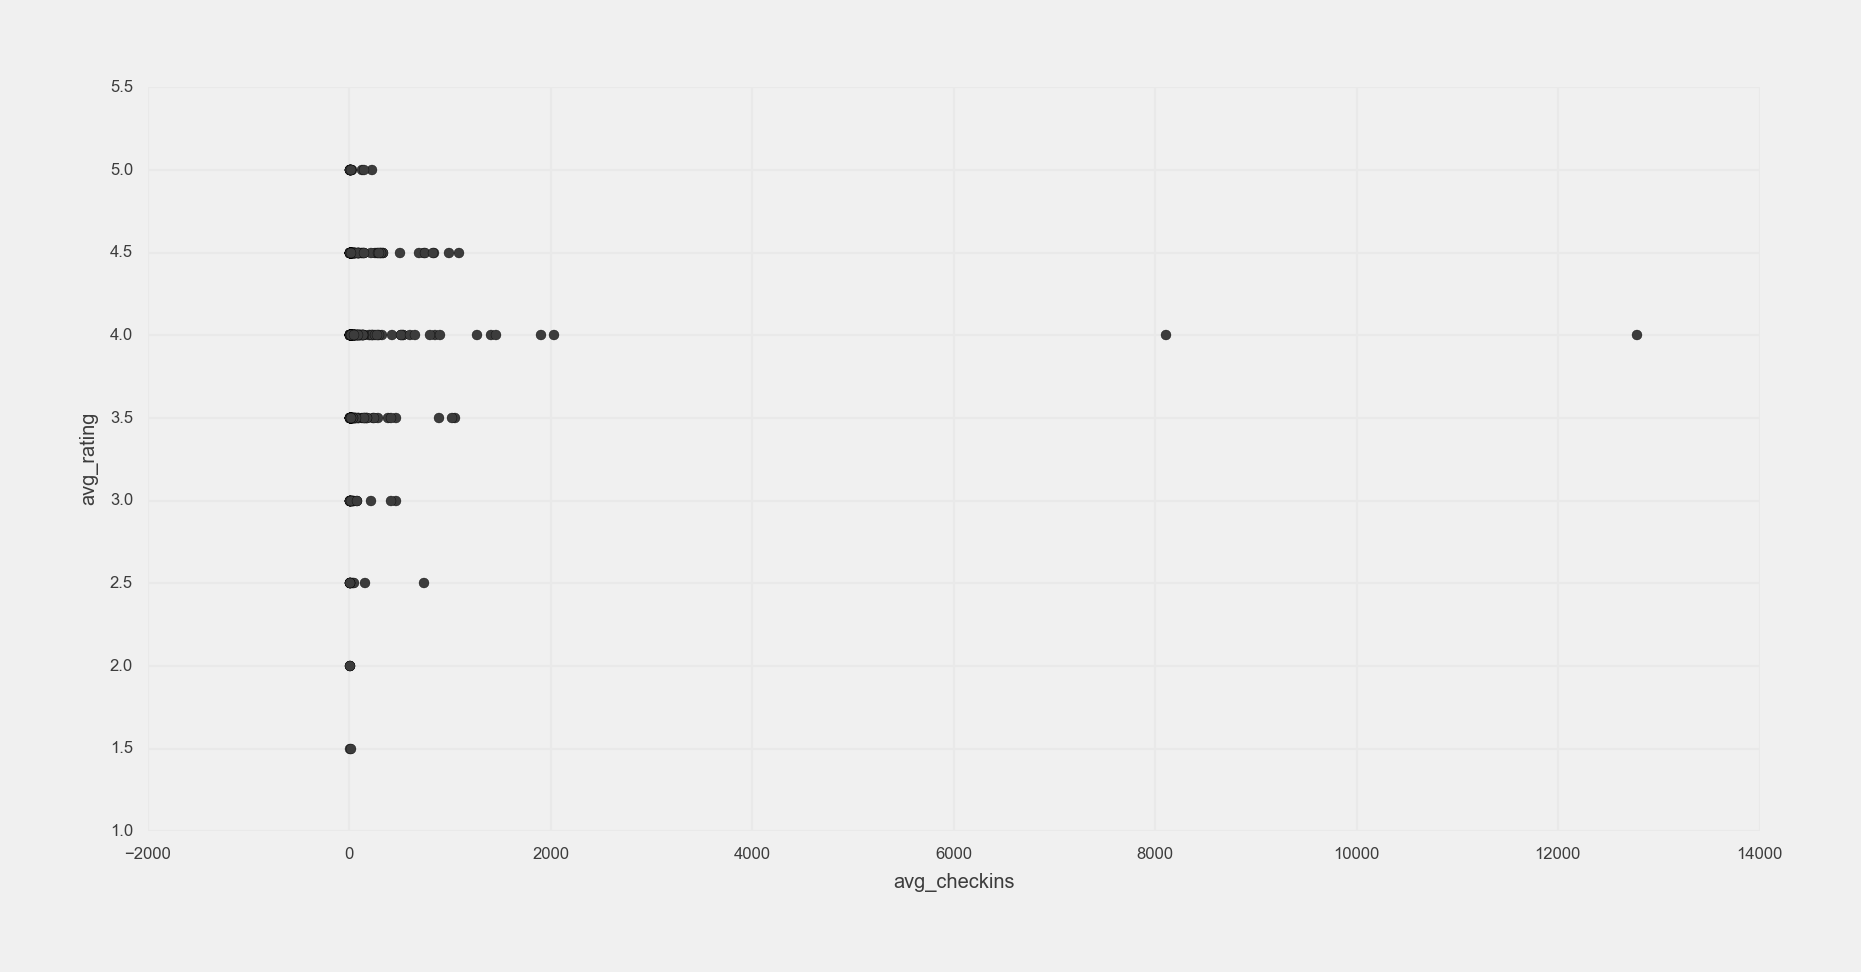

In [275]:
checkin_rating.plot(x='avg_checkins', y='avg_rating', kind='scatter')

## Rating overlap

# By location

In [282]:
top_cities = restaurants_df['city'].value_counts().iloc[:30].index

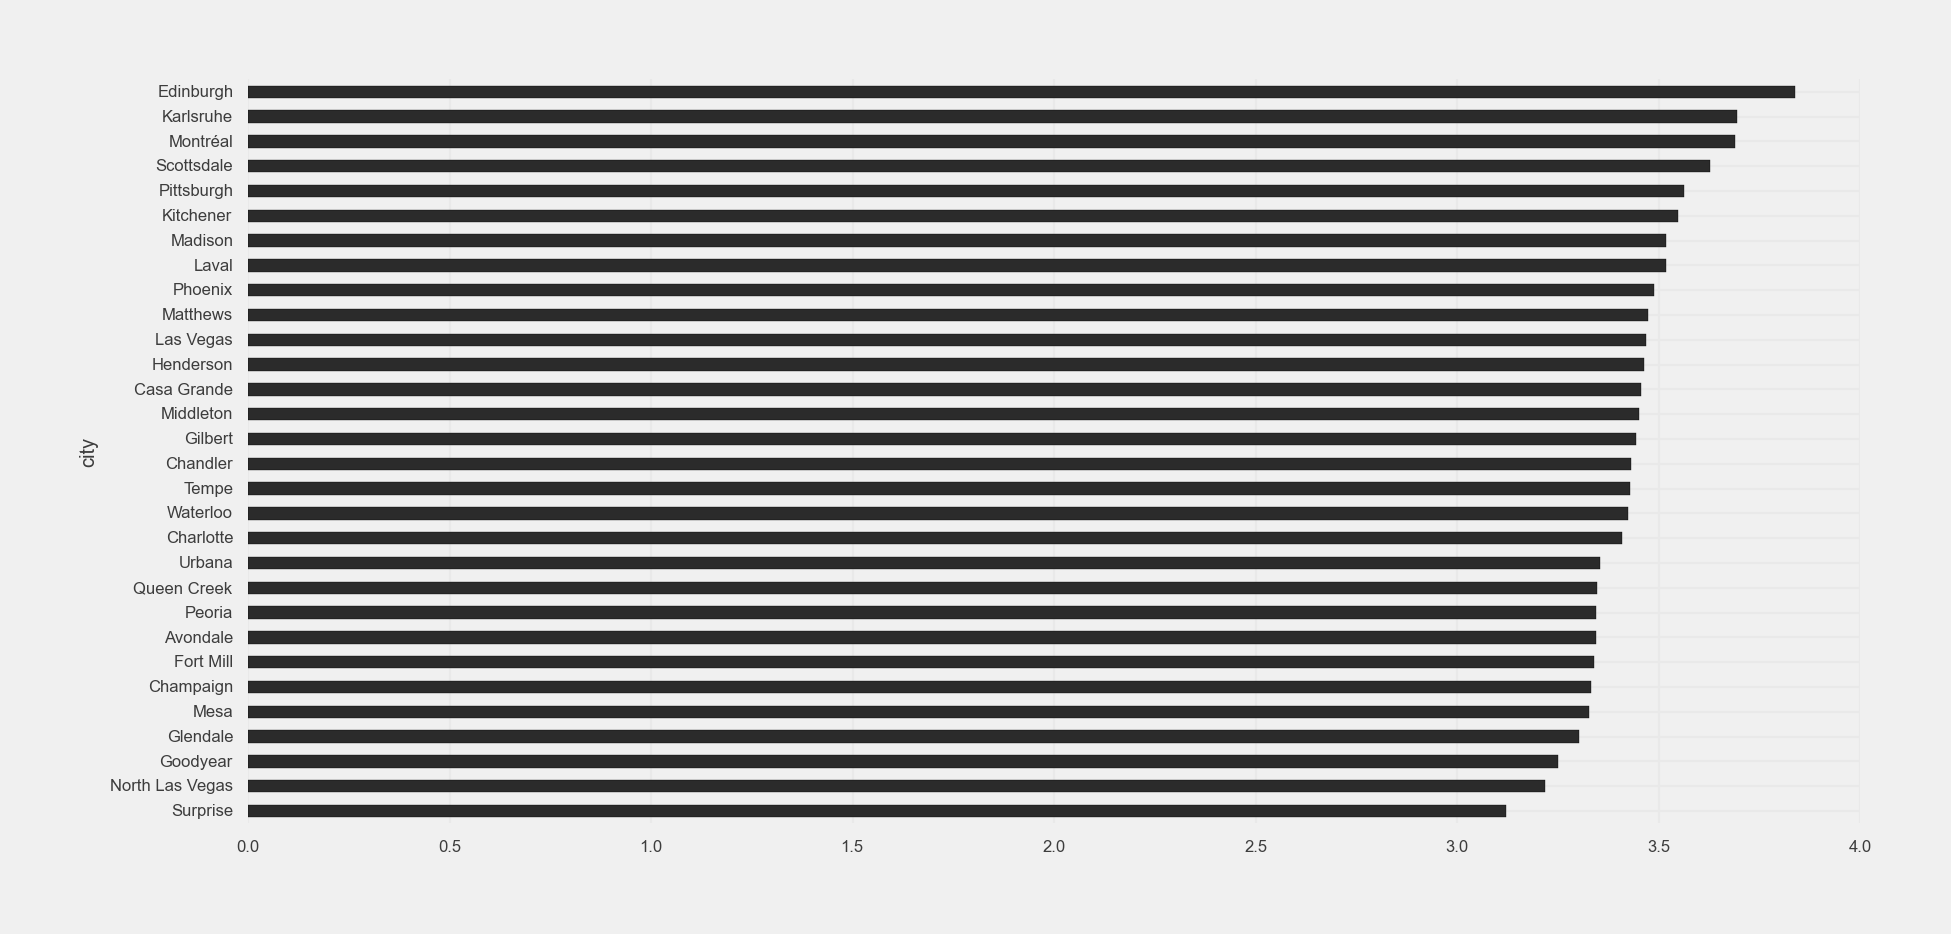

In [283]:
(restaurants_df
 .merge(business_category_df, on='business_id')
 .loc[lambda x: x['city'].isin(top_cities)]
 .groupby('city')
 .stars
 .mean()
 .sort_values(ascending=True)
).plot(kind='barh')

# By category-location

In [ ]:
reviews = pd.read_json('./reviews.json', orient='records')

In [206]:
reviews['funny']= reviews['votes'].apply(lambda x: x['funny'])

In [207]:
reviews['useful']= reviews['votes'].apply(lambda x: x['useful'])

In [208]:
reviews['cool']= reviews['votes'].apply(lambda x: x['cool'])

In [4]:
business = pd.read_json('./business.json', orient='records')

In [8]:
business['attributes'].head()

0    {u'Take-out': True, u'Drive-Thru': False, u'Go...
1    {u'Alcohol': u'full_bar', u'Noise Level': u'av...
2    {u'Alcohol': u'full_bar', u'Noise Level': u'lo...
3    {u'Take-out': True, u'Drive-Thru': False, u'Go...
4    {u'Alcohol': u'full_bar', u'Noise Level': u'av...
Name: attributes, dtype: object

In [222]:
reviews.sort_values('funny', ascending=False).head(30).merge(business[['business_id', 'name', 'city']], on='business_id')

,business_id,date,review_id,stars,text,type,user_id,votes,funny,useful,cool,name,city
0,sIyHTizqAiGu12XMLX3N3g,2016-01-03,aXMza4-Fl2YBoXrGCUUVKA,2,Both of my disappointments during my latest tr...,review,3fb9i6LAYfmHf3vPNgwOyg,"{u'funny': 151, u'useful': 159, u'cool': 153}",151,159,153,Bacchanal Buffet,Las Vegas
1,wZxrcIHmkhT4OHvIxPwd_A,2011-01-23,5w_yWEGVXVEYYbnD0Roi6g,1,I'm the first real person to review this place...,review,WJSNywtir04BgDDpZVZMpg,"{u'funny': 142, u'useful': 168, u'cool': 138}",142,168,138,D.O.C.G. Enoteca,Las Vegas
2,xIUWIc8eJsQPRuHD0RDrIA,2016-01-06,qvVVS5P-tUuO3beQIcdQEQ,4,This was our last meal in Las Vegas and we wer...,review,3fb9i6LAYfmHf3vPNgwOyg,"{u'funny': 139, u'useful': 150, u'cool': 145}",139,150,145,Inna Gadda di Pizza,Las Vegas
3,jt483eMod3OR36S3KMN4gg,2016-01-05,VBbX9B-47A8qq-5MCdmFLg,5,"""F"" must stand for fun...because it was defini...",review,WmAyExqSWoiYZ5XEqpk_Uw,"{u'funny': 122, u'useful': 154, u'cool': 138}",122,154,138,F Pigalle,Las Vegas
4,8T4aPvtpugzUxJc-DVrLHg,2015-07-16,oifBYPbfKjY9tZJVdKcg5w,4,Note to self: don't eat here alone. \n\nWhat ...,review,WmAyExqSWoiYZ5XEqpk_Uw,"{u'funny': 118, u'useful': 118, u'cool': 103}",118,118,103,Dumpling King,Las Vegas
5,I5qL7msFJJGh22MMg1AMnw,2016-04-13,C_9GgYO1hNSKyhfvVZraFg,2,If a college party bar had a head-on collision...,review,WmAyExqSWoiYZ5XEqpk_Uw,"{u'funny': 116, u'useful': 120, u'cool': 100}",116,120,100,Sake Rok,Las Vegas
6,vbcdf7dXxfc3uyOoi7ryyA,2015-04-28,8aEtn4tK3RNZ-ObLOASMnQ,4,You like to drink? How about unlimited mimosas...,review,yzzMVn19ajbdZigjrMN64Q,"{u'funny': 113, u'useful': 134, u'cool': 131}",113,134,131,Bistro Buffet,Las Vegas
7,RPDbyZWiN_ayXevgko0zOA,2016-06-15,_r8__uLKaX9cCcSWpw5cjA,5,NEWSFLASH: the Hobak bib will be THE Las Vegas...,review,WmAyExqSWoiYZ5XEqpk_Uw,"{u'funny': 100, u'useful': 130, u'cool': 108}",100,130,108,Hobak Korean BBQ,Las Vegas
8,VVeogjZya58oiTxK7qUjAQ,2014-05-24,Q1FB2G18Y_5YSJseCC2AUg,5,"Pizzeria Bianco isn't just a restaurant, it's ...",review,zfb_dSwWV5mV4f_ZAgkYbg,"{u'funny': 95, u'useful': 124, u'cool': 121}",95,124,121,Pizzeria Bianco,Phoenix
9,6X9iyuM2XdoCGT4q9qv5cA,2014-05-10,CluvkM5Apawxk0cE7Nuu8Q,2,I gave away our card with 4 stamps at the end ...,review,WmAyExqSWoiYZ5XEqpk_Uw,"{u'funny': 87, u'useful': 80, u'cool': 41}",87,80,41,JJANGA Japanese Restaurant,Las Vegas


In [6]:
review_dist = reviews.groupby('business_id')['user_id'].count()

In [27]:
review_dist.quantile(.85)

104.0

In [30]:
review_dist.head()

business_id
--5jkZ3-nUPZxUvtcbr8Uw    112
--AKjxBmhm9DWrh-e0hTOw      4
--BlvDO_RG2yElKu9XA1_g    118
--UE_y6auTgq3FXlvUMkbw    128
--Y_2lDOtVDioX5bwF6GIw     61
Name: user_id, dtype: int64

In [77]:
many_reviews = review_dist[(review_dist > 500)]

In [195]:
len(many_reviews)

385

In [76]:
for i, r in many_reviews.iterkv():
    print i

--5jkZ3-nUPZxUvtcbr8Uw
--BlvDO_RG2yElKu9XA1_g
--UE_y6auTgq3FXlvUMkbw
--pOlFxITWnhzc7SHSIP0A
-0GkcDiIgVm0XzDZC8RFOg
-1ERbsOf9XOC9wGbZYFr7g
-1bOb2izeJBZjHC7NWxiPA
-2n-OHbbwIv3SY8RP9bgTQ
-36CwMJZJigqPMYrx9BJzw
-3WVw1TNQbPBzaKCaQQ1AQ
-3xbryp44xhpN4BohxXDdQ
-4A5xmN21zi_TXnUESauUQ
-584fn2GxYe9sLsgN2WeQA
-5RN56jH78MV2oquLV_G8g
-6Roo-EHgSdUa4rP3tWyRw
-6j-KVPPX2xKjCruNO2HnQ
-6n29ZcBHteJ9eEexoRQ7g
-741QDj3PPLD4Jii2yMU-w
-9pVS__IliMA2aNEYzrQrg
-AAig9FG0s8gYE4f8GfowQ
-BmTlLuabuOD81-_9Q3rvg
-E6XYf1ce1NCtV3QQI-3xA
-ERMB7X_XZvr-XPK32ii4g
-EctXOb3B7T177jGYUhjVA
-GZsHVDlI6wvLsgD1Yaj0g
-JL0CWSLkkzFHZXlctnf8A
-K22CWorrReIV_kgLa6dmQ
-KSjEAnm5w8TBdRVLVwi9Q
-LHHCgIUZy49sUU4j03T2w
-MgFDby-okrbKLBc-SYWdw
-Mh44q324VW8mpxIdH_HPw
-Nd5eId2iqnFvAMNgRBgpA
-O7H5LhBkE13VQZB0QZI0Q
-OfCPTArVfsJy2NrH9J3tA
-Ogv7rpcgUHkFaSy3vD8Sw
-PcyNcCHU8ZWwf6_PwDbUQ
-PyniZNMQuB5u99nr6dYVw
-SNpLwJNup8N96yq7sBJyw
-VnVvJzps8QkDbc1GmHnmQ
-WZ3MCw4wOOnEJyHXw0kAg
-XQAYmeTFv4MR-M5XAZmWw
-a22bjfNCVL0gvKpd6RakA
-b9ZUSmcsGxutDSW1DIbdA
-bd26a1QEEp

/Users/chalpert/.virtualenvs/ds/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: iterkv is deprecated and will be removed in a future release, use ``iteritems`` instead.
  if __name__ == '__main__':


NameError: name 'easel' is not defined

In [102]:
bus[bus['is_good'] != 1.0 ]

,business_id,date,review_id,stars,text,type,user_id,votes,is_good
4,-2n-OHbbwIv3SY8RP9bgTQ,2007-05-23,IIvOukwH8ccTuOrPN1dEhg,3,"An average PF Chang, Cheesecake Factory qualit...",review,wxuIXe9jCIwloEwuNsnVvQ,"{u'funny': 0, u'useful': 0, u'cool': 1}",False
7,-2n-OHbbwIv3SY8RP9bgTQ,2007-10-07,8Lei-I-DZbmO7BfoVS0WJg,3,Maggiano's Little Italy is on the second floor...,review,2rlBbFPHyZjXSFSE8r551w,"{u'funny': 2, u'useful': 7, u'cool': 2}",False
12,-2n-OHbbwIv3SY8RP9bgTQ,2008-01-17,w8L5eW93RQxtTOnwTgZ8EQ,2,Please try the bruschetta. Really good and you...,review,gm3cbeo_55DTLeqpYaYjhg,"{u'funny': 0, u'useful': 0, u'cool': 0}",False
13,-2n-OHbbwIv3SY8RP9bgTQ,2008-02-07,qjKNlyjZOs5Qrb-K8rADdg,3,We went here last Thursday around 7pm and gooo...,review,WmAyExqSWoiYZ5XEqpk_Uw,"{u'funny': 4, u'useful': 5, u'cool': 5}",False
14,-2n-OHbbwIv3SY8RP9bgTQ,2008-03-07,fb2JTAE-SbMJ9zll2fUidw,3,"I'm surprised this place has four stars, which...",review,P90f-Y3yqDZQJOr0Ml8X4A,"{u'funny': 0, u'useful': 0, u'cool': 0}",False
16,-2n-OHbbwIv3SY8RP9bgTQ,2008-05-22,m7HR346cEezchNSg_tUVdQ,3,I'm not the biggest fan of chain places mostly...,review,-ANkfLbDf8aiBQ7vywIL6w,"{u'funny': 7, u'useful': 10, u'cool': 9}",False
21,-2n-OHbbwIv3SY8RP9bgTQ,2008-08-07,KQBWqSCUcsffooZ7OrrgEg,3,"This Maggiano's, like all the others, is what ...",review,5lq4LkrviYgQ4LJNsBYHcA,"{u'funny': 0, u'useful': 0, u'cool': 0}",False
24,-2n-OHbbwIv3SY8RP9bgTQ,2008-09-09,NoOIjhDySQiET9-aSaQ1ng,3,4stars-1star\n4stars for the food. I Love Magg...,review,Qw_d8QV6_B6Ztre-X8L8cA,"{u'funny': 0, u'useful': 0, u'cool': 0}",False
26,-2n-OHbbwIv3SY8RP9bgTQ,2008-10-07,Tl16zbuZ5K6JB1kabPm30Q,3,"I usually like Maggiano's, especially when I c...",review,ucKJFC8_cVK0NbW5uk4xTQ,"{u'funny': 2, u'useful': 1, u'cool': 1}",False
27,-2n-OHbbwIv3SY8RP9bgTQ,2008-10-21,ZpKrQQahx7rQz3GJJzFgYw,2,So i pass by maggianos every time I visit sout...,review,HnbRoBXIDHONocrG61IqxA,"{u'funny': 2, u'useful': 2, u'cool': 2}",False


In [131]:
bus.iloc[:100, 'stars']

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

/Users/chalpert/.virtualenvs/ds/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: iterkv is deprecated and will be removed in a future release, use ``iteritems`` instead.


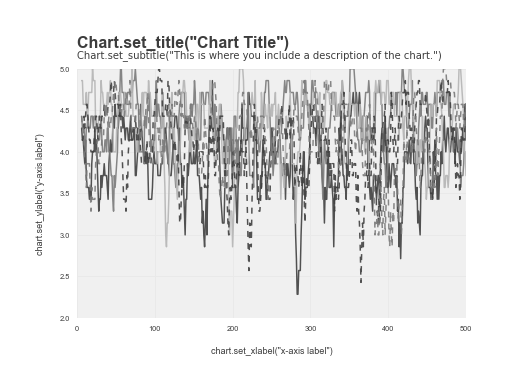

In [204]:
ch = easel.Chart()

results = []
for i, r in many_reviews.head(5).iterkv():
    bus = reviews[reviews['business_id'] == i]
    bus = bus.reset_index(drop=True)
    
    
    bus['max'] = 5.0
    ch.line(bus.index, bus['stars'].rolling(7).mean(), alpha=.9)
    
    
ch.set_xlim(0, 500)

/Users/chalpert/.virtualenvs/ds/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: iterkv is deprecated and will be removed in a future release, use ``iteritems`` instead.


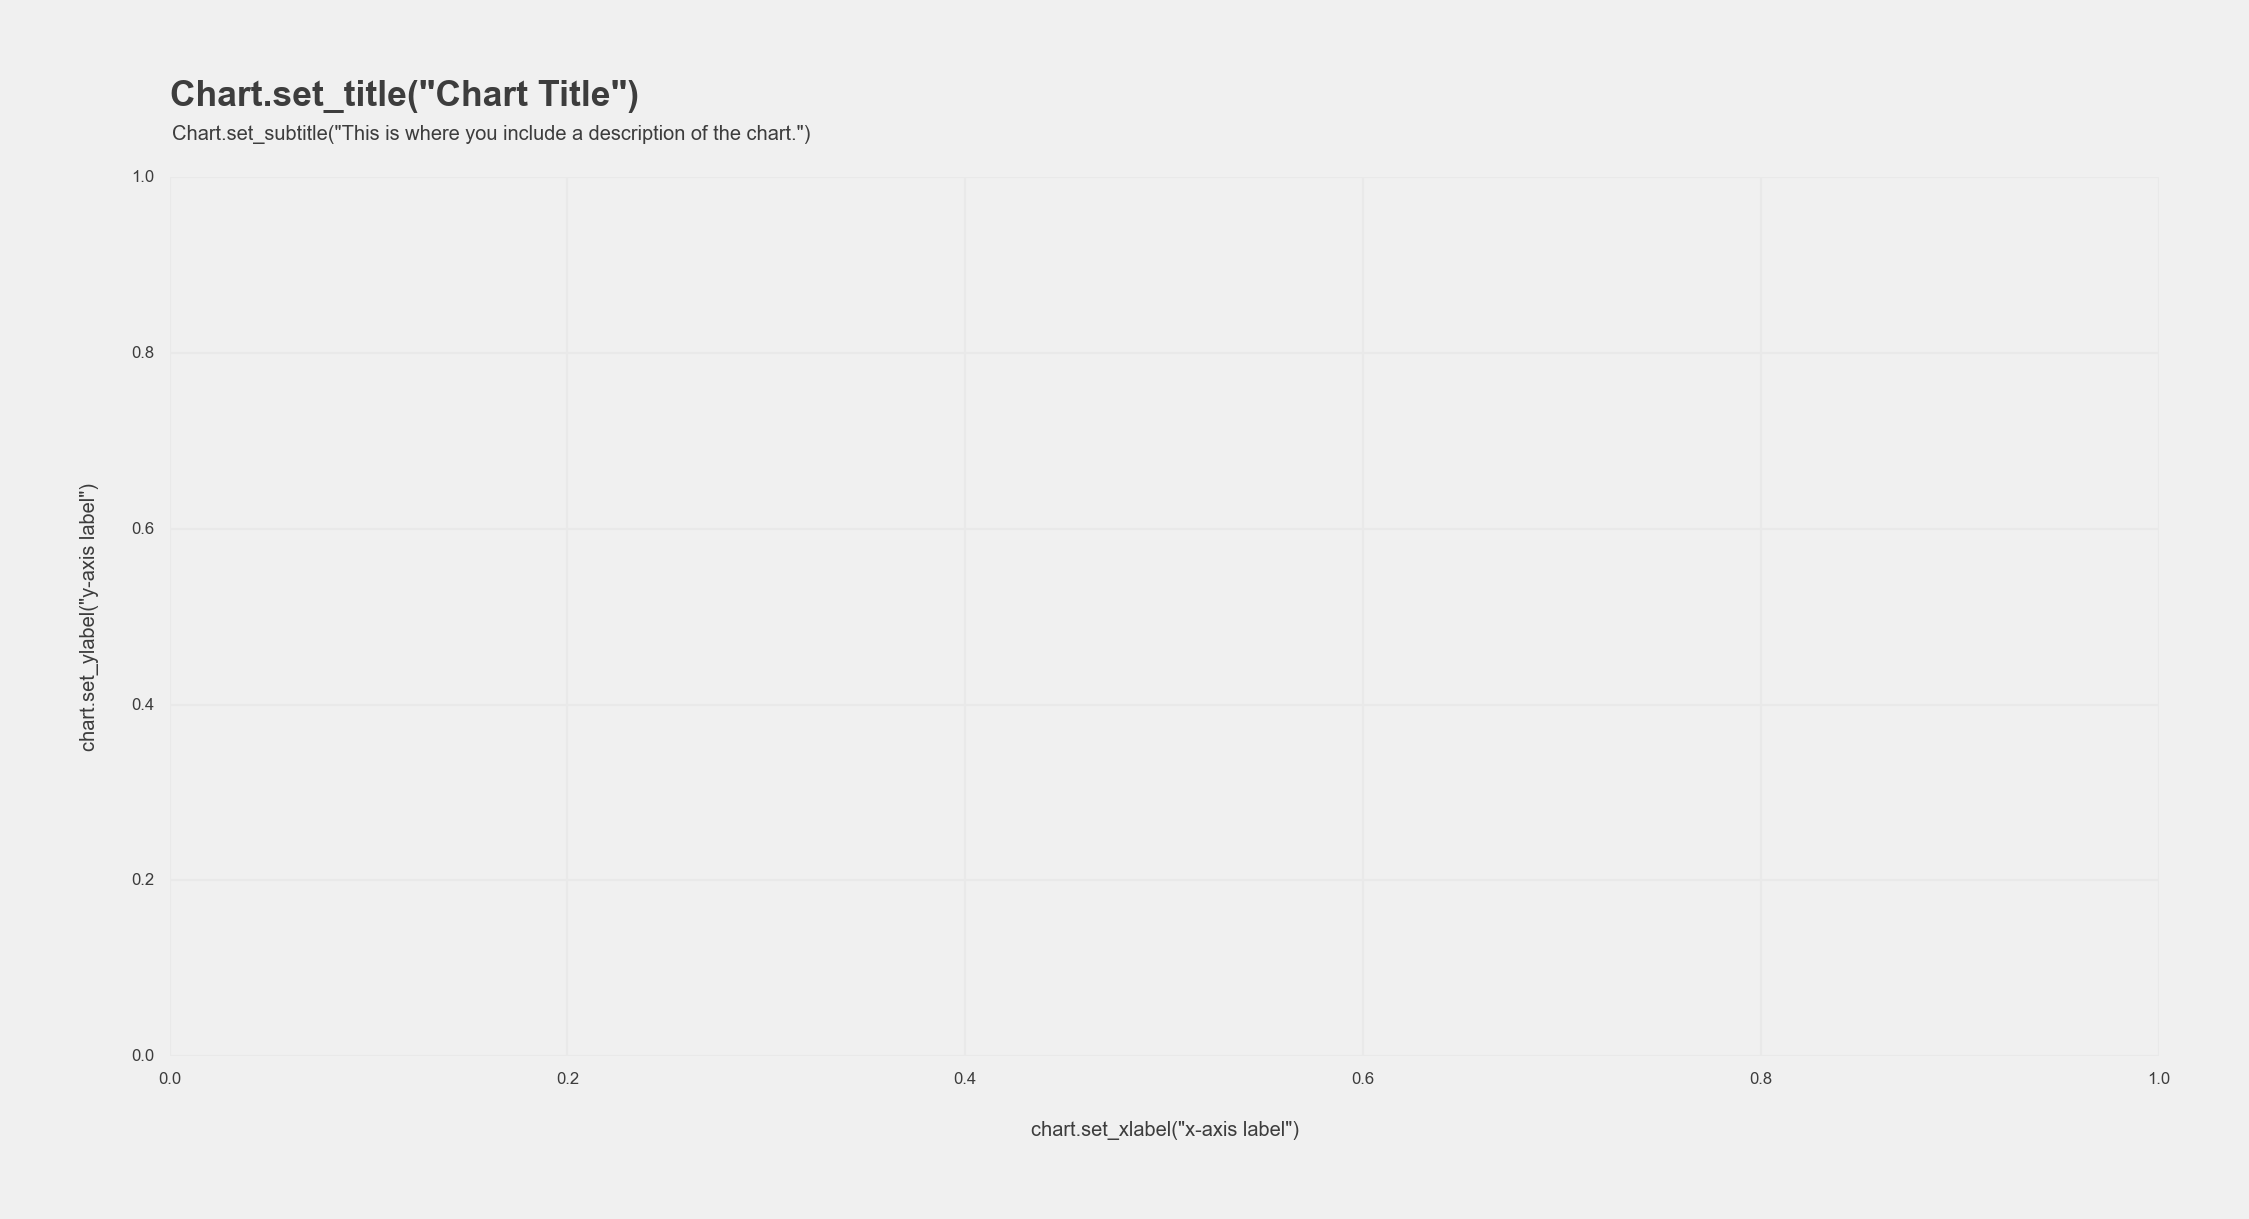

In [152]:
ch = easel.Chart()

results = []
for i, r in many_reviews.iterkv():
    bus = reviews[reviews['business_id'] == i]
    bus = bus.reset_index(drop=True)
    
    
#     bus = pd.DataFrame(bus.groupby('date')['stars'].mean())
    bus['max'] = 5.
    
    review_100 = bus['stars'].iloc[0:100].mean()
    review_200 = bus['stars'].iloc[100:200].mean()
    review_500 = bus['stars'].iloc[500:600].mean()
    results.append({'100': review_100,
                   '200': review_200,
                   '500': review_500,
                   'bus': i})
#     ch.line(bus.index, bus['stars'].rolling(100).sum() / bus['max'].rolling(100).sum(), alpha=.9)
    
    
# ch.set_xlim(0, 500)

In [165]:
diff = pd.DataFrame(results)

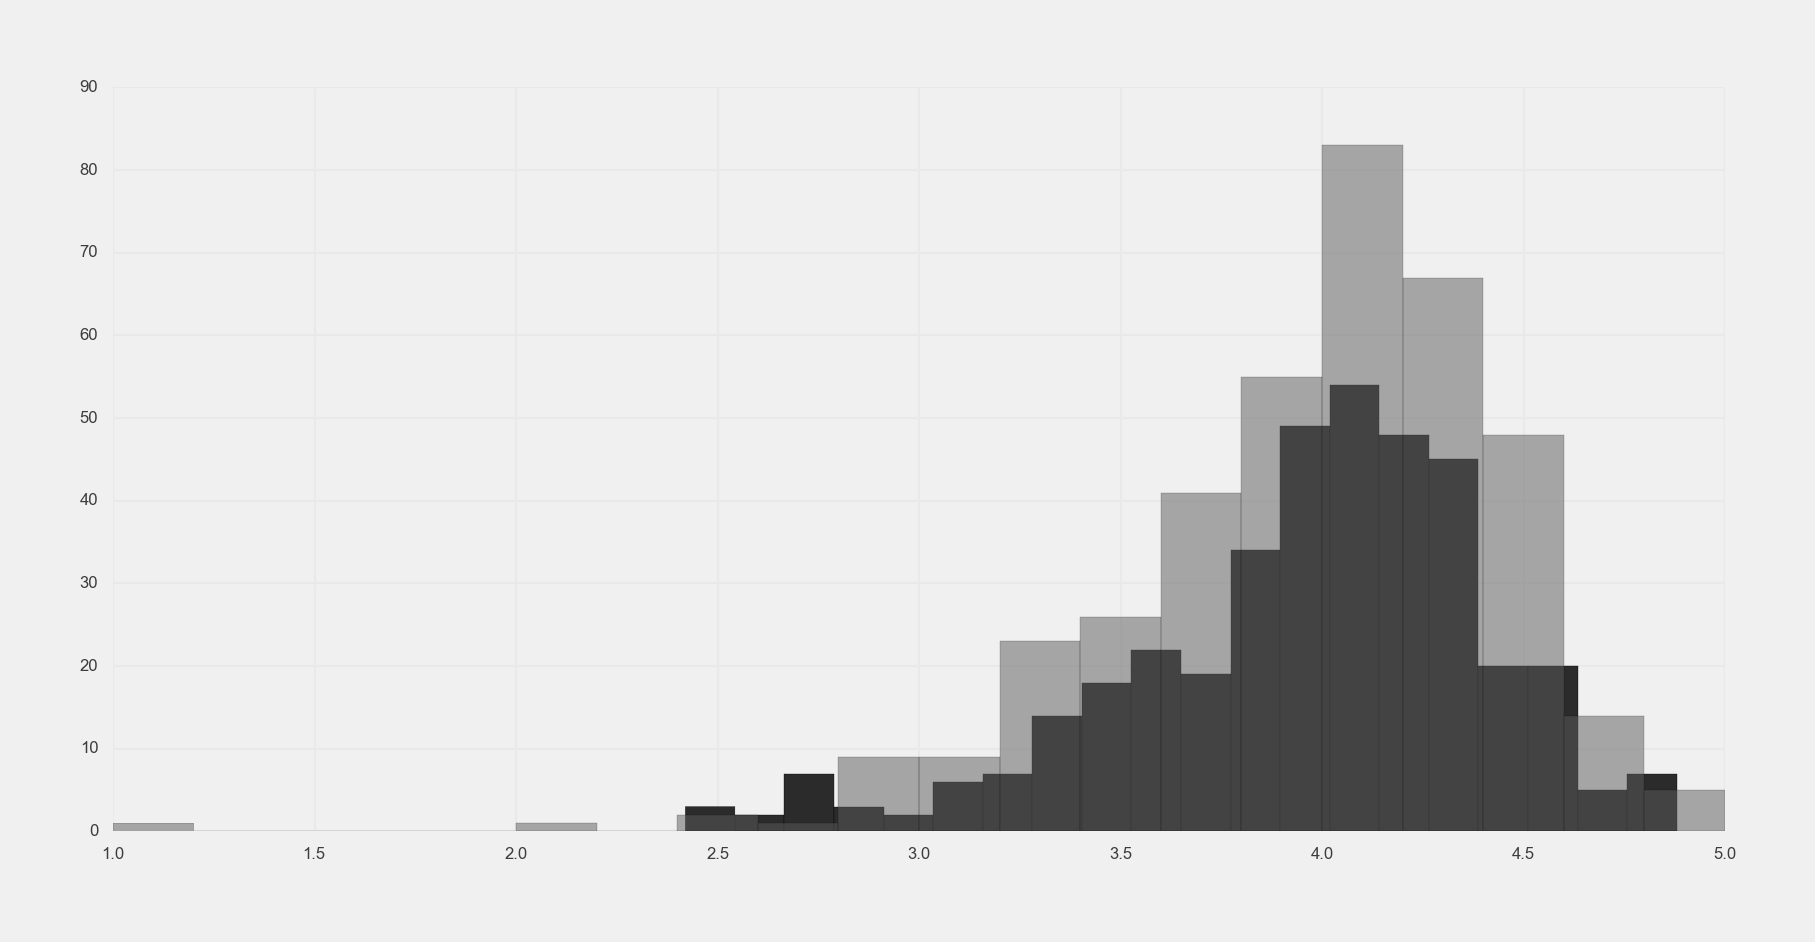

In [173]:
diff['100'].hist(bins=20)
diff['500'].hist(bins=20, alpha=.5)

In [190]:
diff['better'] = diff['200'] > diff['100'] + 2* diff.std()['100'] / 10

In [191]:
diff['worse'] = diff['200'] < diff['100'] - 2* diff.std()['100'] / 10

In [192]:
diff['diff'] = diff['200'] - diff['100']

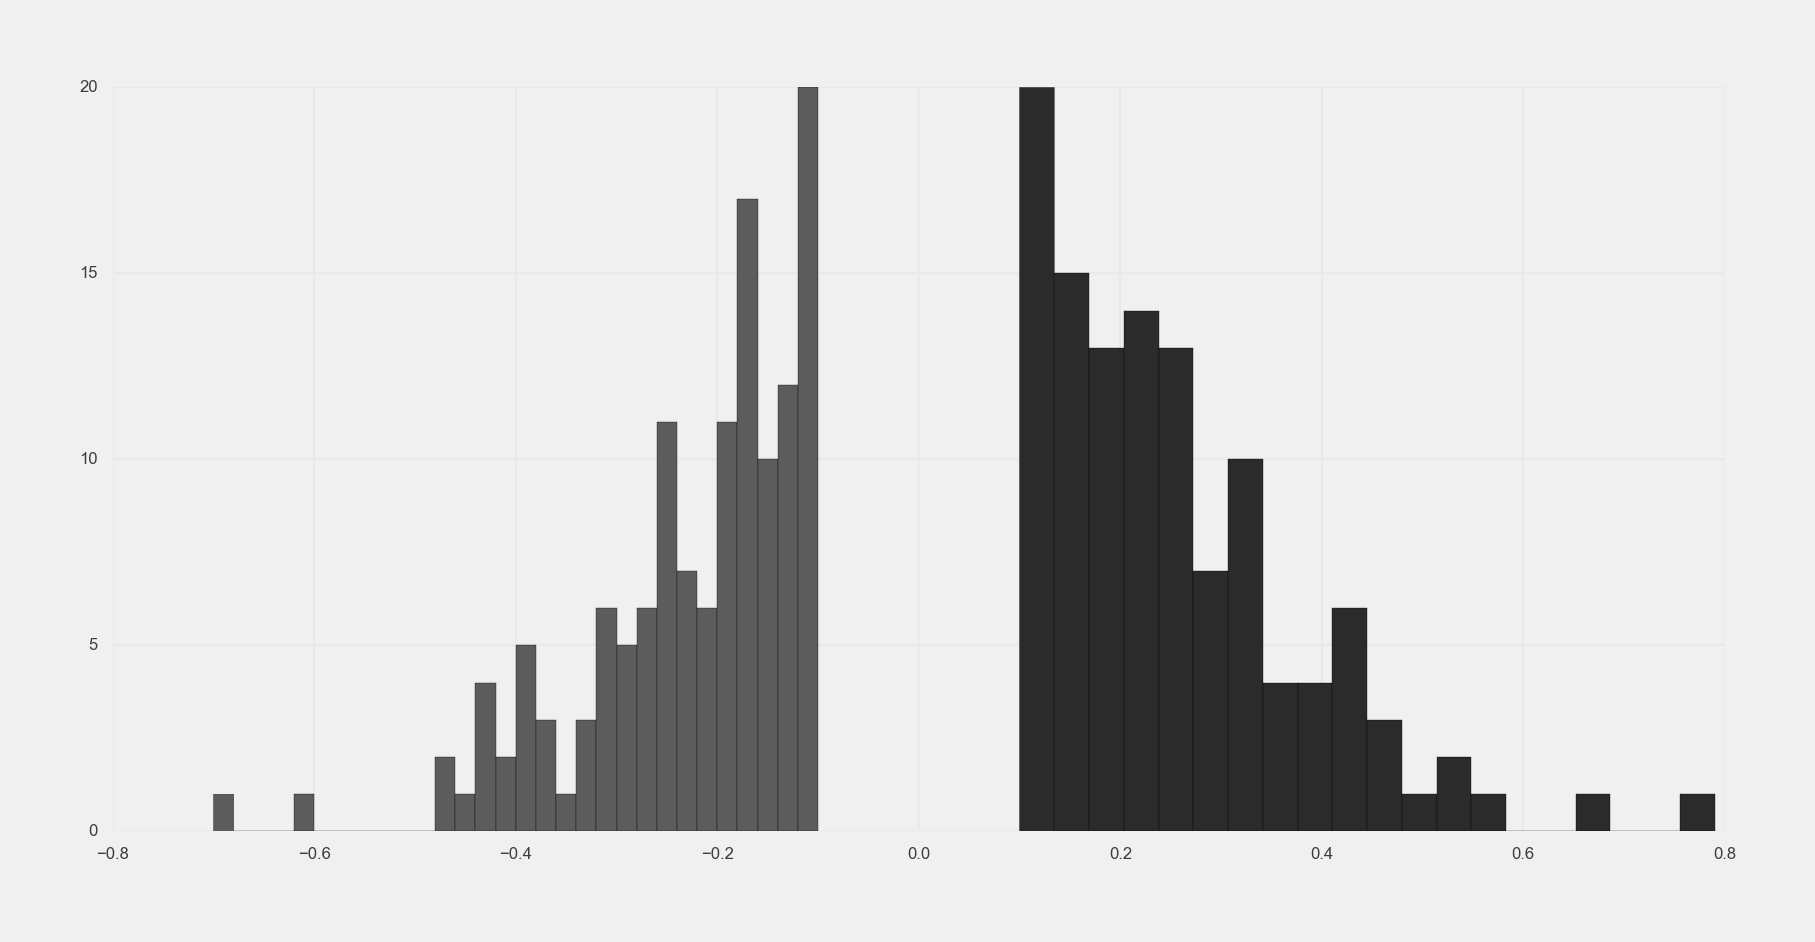

In [193]:
diff[diff['better'] == True]['diff'].hist(bins=20)
diff[diff['worse'] == True]['diff'].hist(bins=30)

,100,200,500,bus,better,worse,diff
0,3.98,3.88,3.990000,-2n-OHbbwIv3SY8RP9bgTQ,False,False,0.010000
1,4.32,4.34,3.940000,-4A5xmN21zi_TXnUESauUQ,False,True,-0.380000
2,4.55,4.12,4.384615,-5RN56jH78MV2oquLV_G8g,False,True,-0.165385
3,4.22,4.08,3.826087,-SNpLwJNup8N96yq7sBJyw,False,True,-0.393913
4,4.28,4.22,4.140000,-sC66z4SO3tR7nFCjfQwuQ,False,True,-0.140000
5,4.12,4.12,4.200000,-vVQyTVHitF6TOHGijVXxQ,False,False,0.080000
6,4.50,4.28,4.370000,05fTEsjUPVo5jks8PpNKCQ,False,True,-0.130000
7,3.94,3.70,4.020000,05tazaFQt1EnQ_Gk_1AFyg,False,False,0.080000
8,3.84,3.91,4.259259,1MQmujTuU-3qPdoogdA8CQ,True,False,0.419259
9,4.14,3.78,3.920000,1NZLxU5WvB5roPFzneAlLw,False,True,-0.220000


In [156]:
diff.std()

100    0.370074
200    0.327858
500    0.561109
dtype: float64

In [155]:
diff.mean()

100    4.020800
200    4.014600
500    3.967397
dtype: float64

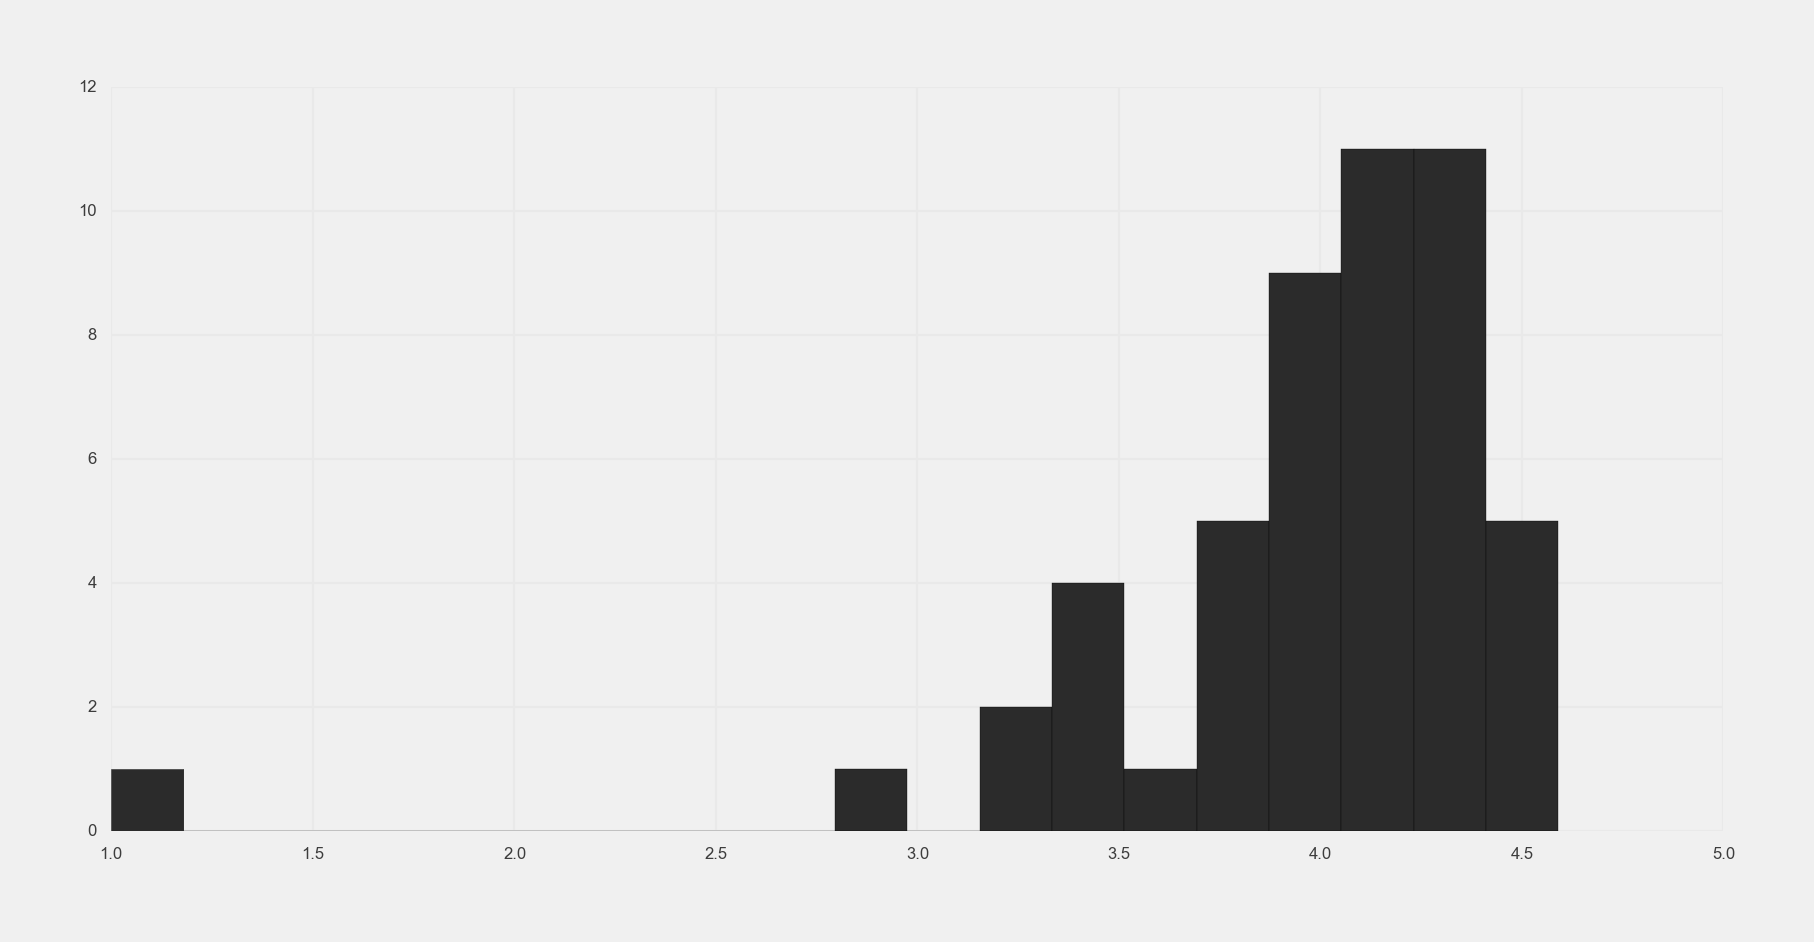

In [153]:
diff['500'].hist(bins=20)

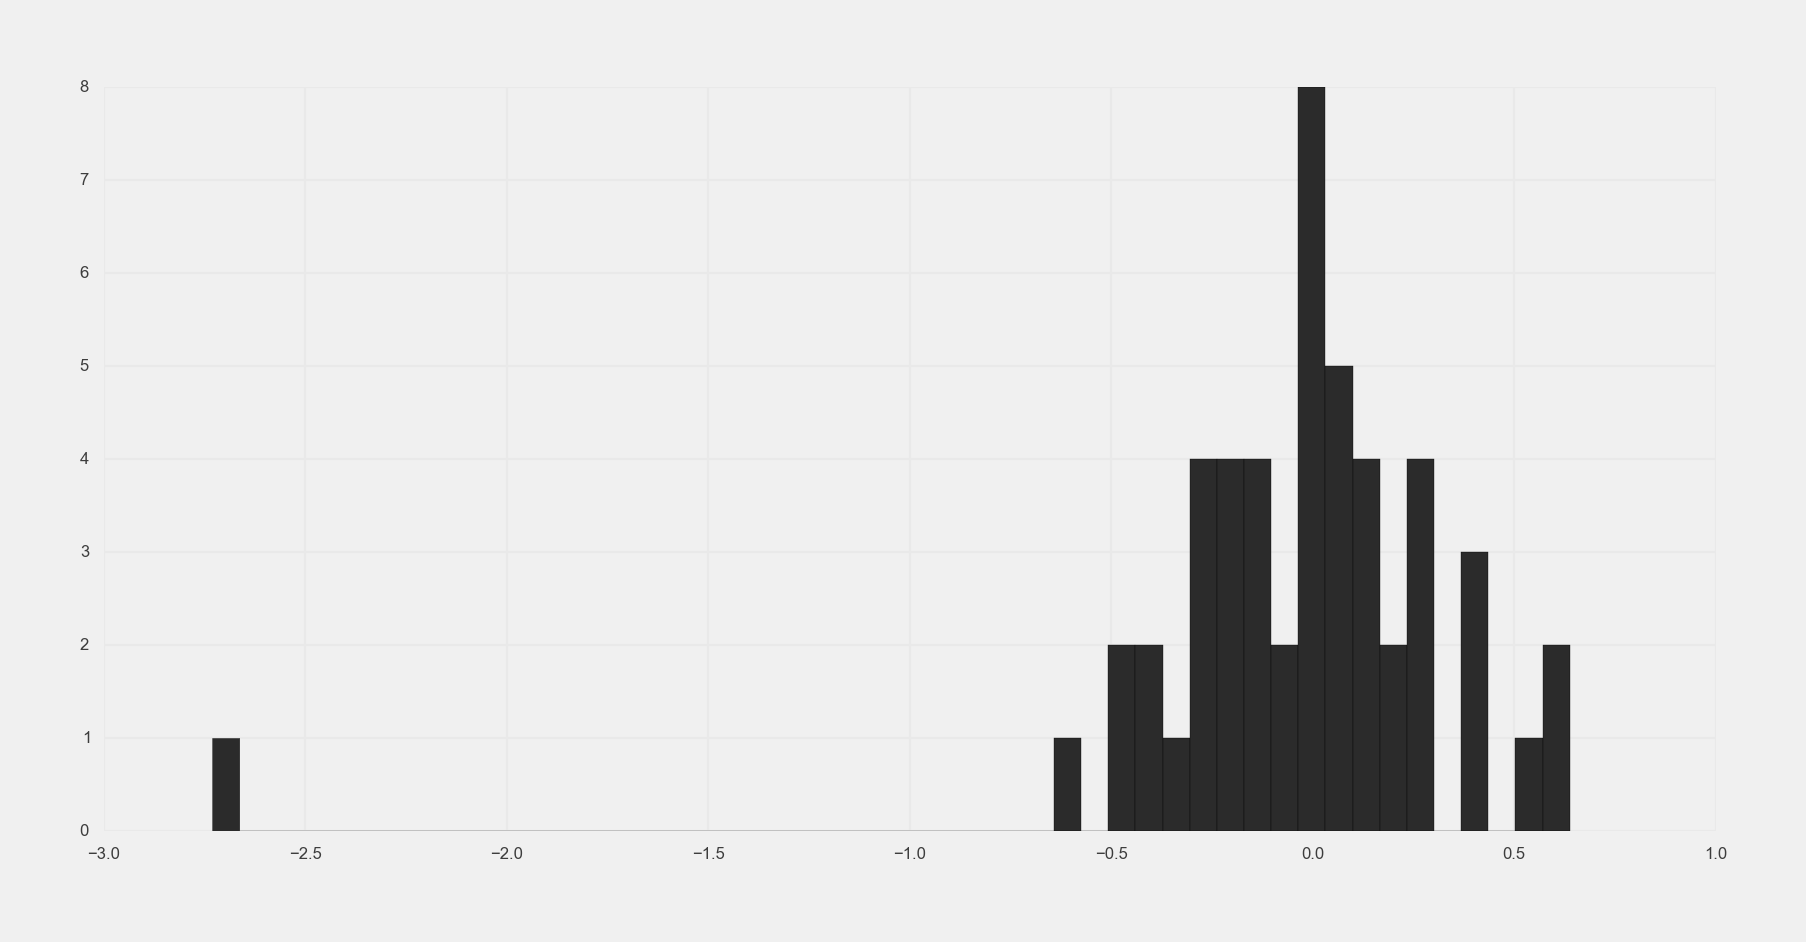

In [147]:
(diff['500'] - diff['100']).hist(bins=50)